In [1]:
# Let's import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Let's load our dataset

housing_train=pd.read_csv("train.csv")
housing_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [4]:
# Let's display all columns with null values and their respective null values count

housing_nan=pd.DataFrame(housing_train[housing_train.columns[housing_train.isnull().any()]].isnull().sum())
housing_nan.columns=['null_values']
housing_nan['% of null values']=housing_nan['null_values']/11.68
housing_nan

null_values  % of null values
LotFrontage           214         18.321918
Alley                1091         93.407534
MasVnrType              7          0.599315
MasVnrArea              7          0.599315
BsmtQual               30          2.568493
BsmtCond               30          2.568493
BsmtExposure           31          2.654110
BsmtFinType1           30          2.568493
BsmtFinType2           31          2.654110
FireplaceQu           551         47.174658
GarageType             64          5.479452
GarageYrBlt            64          5.479452
GarageFinish           64          5.479452
GarageQual             64          5.479452
GarageCond             64          5.479452
PoolQC               1161         99.400685
Fence                 931         79.708904
MiscFeature          1124         96.232877

In [5]:
housing_train.shape

(1168, 81)

Observation:

There are 1168 rows and 81 columns present in the dataset.

In [6]:
housing_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
housing_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Observation:

              There are two types of data present in the dataset categorical and numerical.

In [8]:
# Let's check the information of our dataset

housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
# Let's explore the categorical columns

for column in housing_train.columns:
    if housing_train[column].dtypes == object:
        print(str(column) + ' : ' + str(housing_train[column].unique()))
        print(housing_train[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

Observation:

       There is only one unique value present in utilities column so we will be dropping this column.

     In categorical columns there are missing values present in coumns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Handling Missing Values

In [10]:
# Let's check if there any missing values in our dataset

housing_train.isnull().values.any()

True

In [11]:
# Let's check the missing values of top 30 columns

housing_train.isnull().sum().sort_values(ascending = False).head(30)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

Observation:

There are 1161 missing values in the column PoolQC, 1124 in MiscFeature, 11091 in Alley, 931 in Fence, 551 in FireplaceQu,214 in LotFrontage, 64 each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31 in BsmtExposure and BsmtFinType2, 30 in BsmtCond and BsmtQual, 7 in MasVnrArea and MasVnrType present in our dataset.

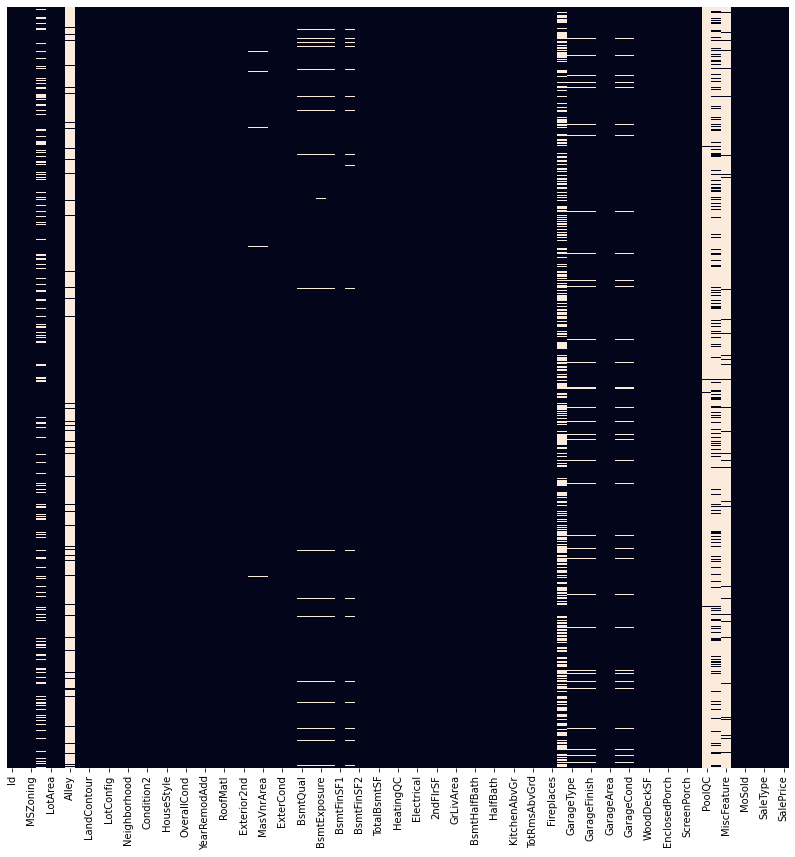

In [12]:
# Let's Visualize the missing values

plt.figure(figsize=(14,14))
sns.heatmap(housing_train.isnull(),yticklabels=False,cbar=False);

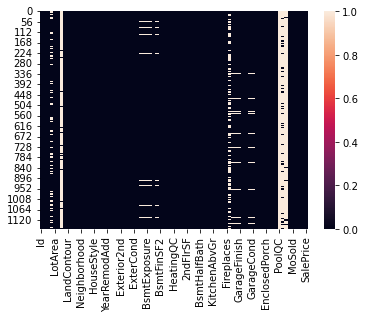

In [13]:
# Let's plot the heat map for our missing values

sns.heatmap(housing_train.isnull());

In [14]:
# Let's check the percentage of missing values of each column

def missing_values_table(housing_train):
    mis_val = housing_train.isnull().sum()
    mis_val_percent = 100 * housing_train.isnull().sum() / len(housing_train)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(housing_train.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(housing_train)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

Observation:

Majority of data is missing in the columns PoolQC, MiscFeature, Alley and Fence

In [15]:
# Let's fill the missing values in categorical columns as NA

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
housing_train[columns] = housing_train[columns].fillna('NA')

In [16]:
# Let's fill the missing values in MasVnrType with None

housing_train['MasVnrType'] = housing_train['MasVnrType'].fillna('None')

In [17]:
# Let's fill the missing values in GarageYrBlt with 0

housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].fillna('0')

In [18]:
# Let's Imputing the missing values and replace it with the median

housing_train['LotFrontage'].fillna(housing_train['LotFrontage'].median(),inplace=True)
housing_train['MasVnrArea'].fillna(housing_train['MasVnrArea'].median(),inplace=True)

In [19]:
# Let's check the statistical summary of our dataset

housing_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027   
std       1.124343    30.145255     20.785185   182.218483   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000       0.00

Observation:

Maximum standard deviation of 8957.44 is observed in LotArea column.

Maximum SalePrice of a house observed is 755000 and minimum is 34900.

In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [20]:
# Let's check the correlation

housing_train_cor=housing_train.corr()
housing_train_cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006165 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336234 -0.124151     0.070462   
LotFrontage   -0.006165   -0.336234     1.000000  0.296790     0.229981   
LotArea       -0.029212   -0.124151     0.296790  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229981  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047851  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112000  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.089513  0.027228     0.555945   
MasVnrArea    -0.061397    0.028215     0.188273  0.120192     0.403985   
BsmtFinSF1     0.003868   -0.052236     0.227732  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.001253  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.115628  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356180  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.402864  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089816  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.008087 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374000  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001375  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171842  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318941  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.228494  0.285983     0.390067   
GarageCars     0.007549   -0.027639     0.260224  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151044  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.021103 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.050499  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030440  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.195973  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.002830  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022579  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004162 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323851  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.061397    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.028215   -0.052236   
LotFrontage      -0.047851   0.112000      0.089513    0.188273    0.227732   
LotArea           0.017513   0.005506      0.027228    0.120192    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.403985    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.135133   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.318562    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.178583    0.114430   
MasVnrArea       -0.135133   0.318562      0.178583    1.000000    0.263377   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.263377    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.064685   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.108974   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.362330    0.518940   
1stFlrSF         -0.134420   0.279450      0.233384    0.334512 

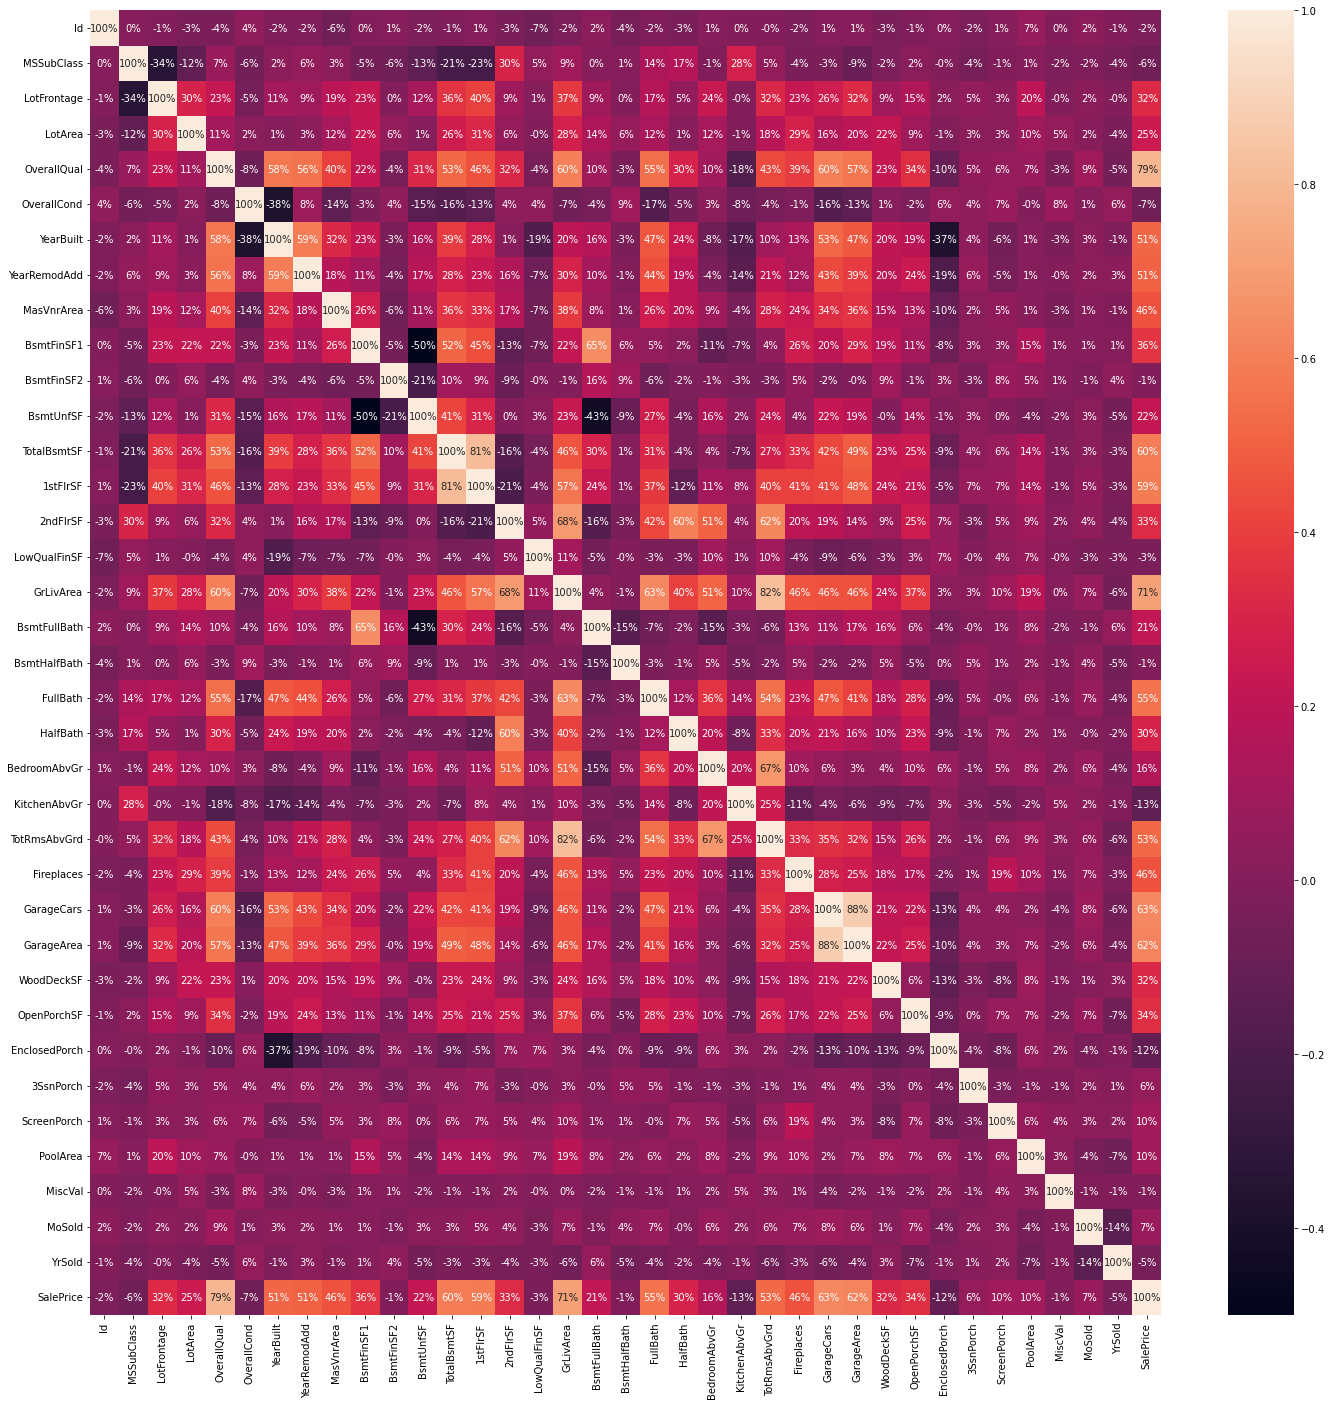

In [21]:
# Let's plot the heat map

plt.figure(figsize=(24,24))
sns.heatmap(housing_train_cor,annot=True,fmt='.0%')
plt.show()

Observation:

SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

No correlation has been observed between the column Id and other columns so we will be dropping this column.

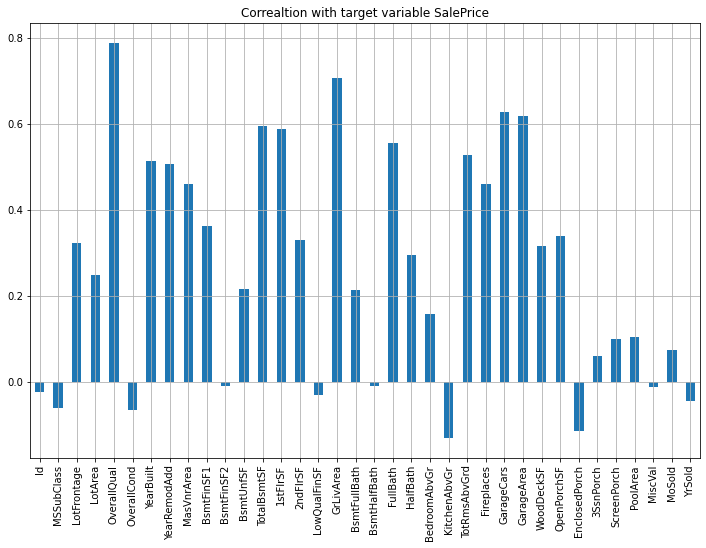

In [22]:
# Let's check the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
housing_train.drop('SalePrice', axis=1).corrwith(housing_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice");

Observation:

The column OverallQual is most positively correlated with SalePrice.

The column KitchenAbvGrd is most negatively correlated with SalePrice

# Data Visualization

Univatriate Analysis

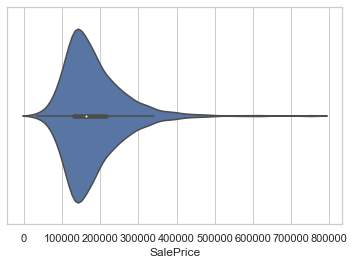

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

In [23]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(housing_train['SalePrice'])
plt.show()

housing_train['SalePrice'].value_counts()

Observation:

Maximum number of SalePrice lies between 140000 and 230000.

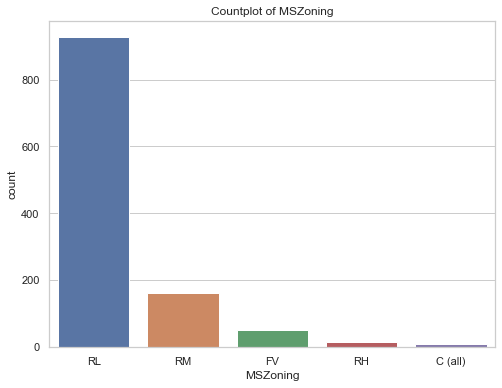

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [24]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=housing_train)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

housing_train['MSZoning'].value_counts()

Observation:

Maximum, 928 number of MSZoning are RL.

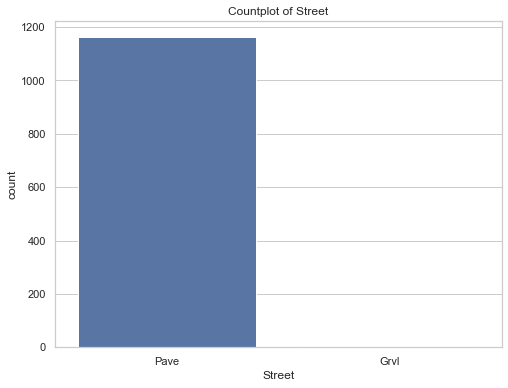

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [25]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=housing_train)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

housing_train['Street'].value_counts()

Observation:

Maximum, 1164 number of Street are Pave where as only 4 are Grvl.

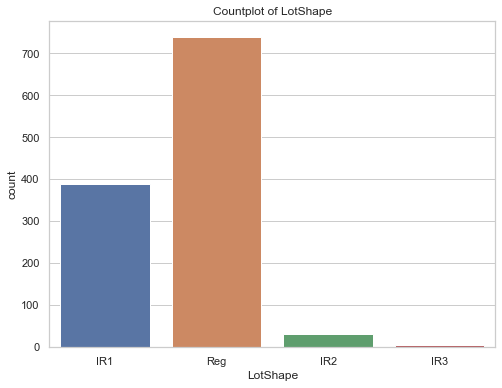

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [26]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=housing_train)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

housing_train['LotShape'].value_counts()

Observation:

Maximum, 740 number of LotShape are Reg.

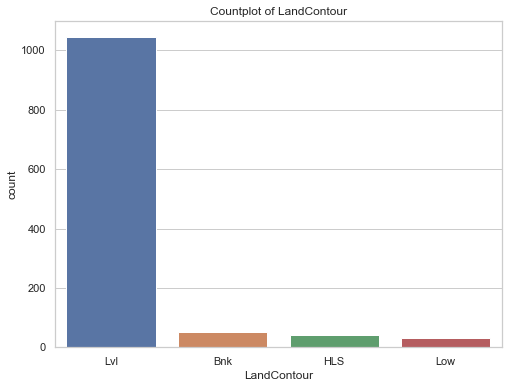

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [27]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=housing_train)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

housing_train['LandContour'].value_counts()

Observation:

Maximum, 1046 number of LandContour are Lvl.

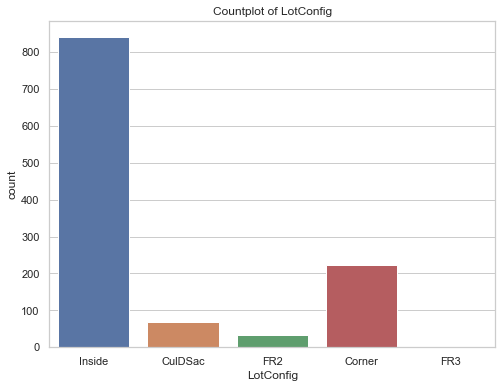

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [28]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=housing_train)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

housing_train['LotConfig'].value_counts()

Observation:

Maximum, 842 number of LotConfig are Inside.

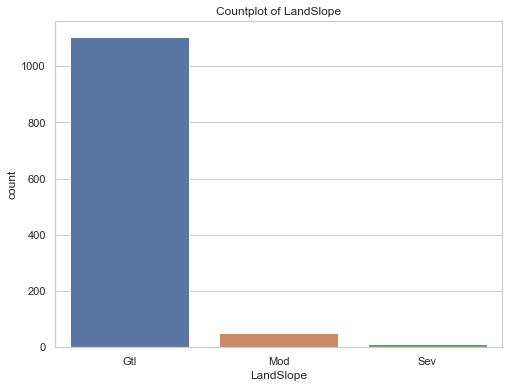

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [29]:
# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=housing_train)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

housing_train['LandSlope'].value_counts()

Observation:

Maximum, 1105 number of LandSlope are Gtl.

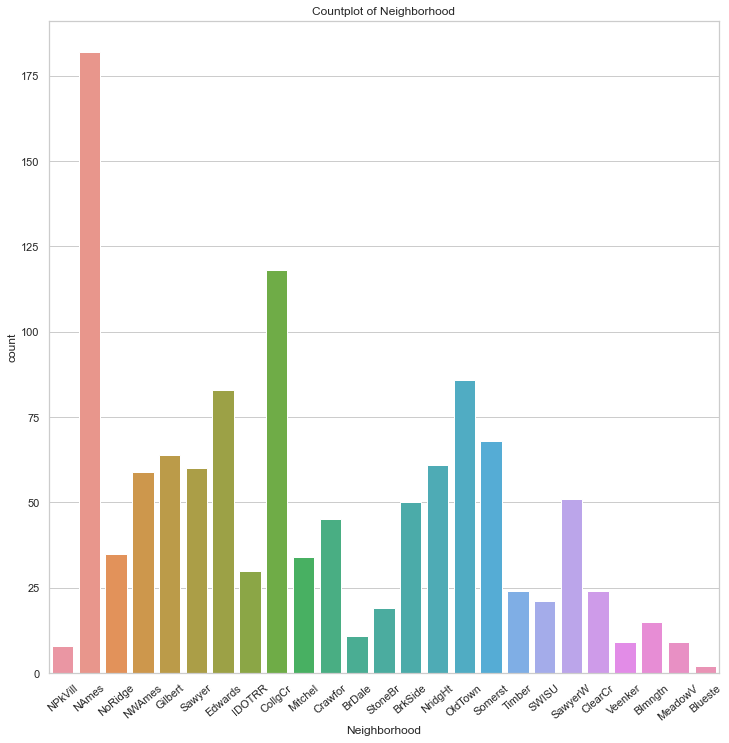

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [30]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=housing_train)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

housing_train['Neighborhood'].value_counts()

Observation:

Maximum, 182 number of Neighborhood are Names.

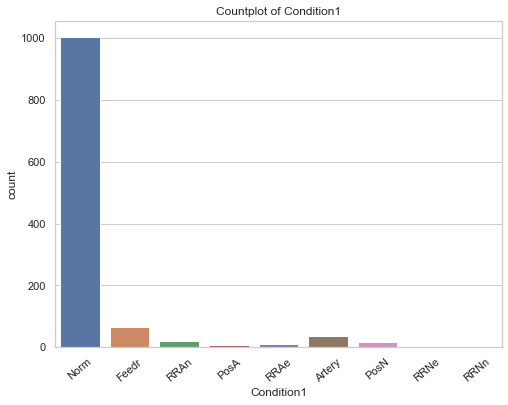

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [31]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=housing_train)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

housing_train['Condition1'].value_counts()

Observation:

Maximum, 1005 number of Condition1 is Norm.

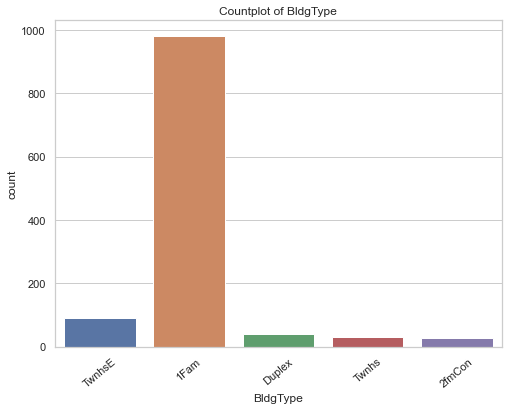

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [32]:
# Let's check the column BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=housing_train)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

housing_train['BldgType'].value_counts()

Observation:

Maximum, 981 number of BldgType are 1Fam.

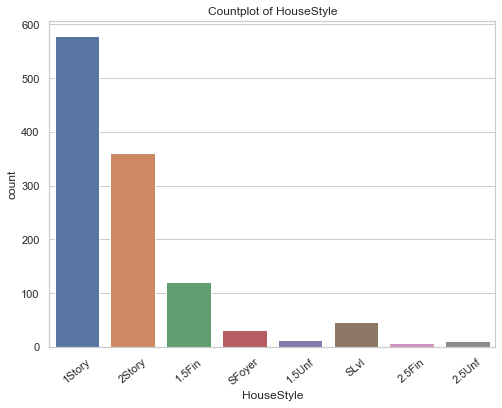

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [33]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=housing_train)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

housing_train['HouseStyle'].value_counts()

Observation:

1 Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc

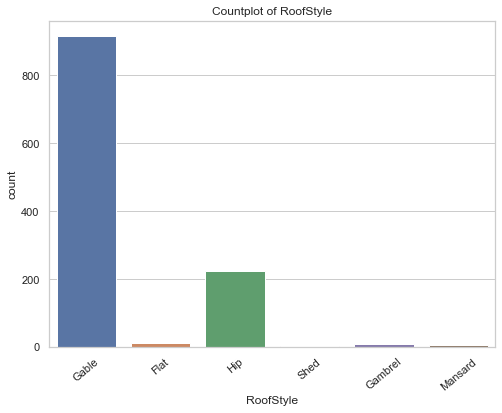

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [34]:
# Let's check the column RoofStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=housing_train)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

housing_train['RoofStyle'].value_counts()

Observation:

Maximum, 915 number of RoofStyle are Gable.

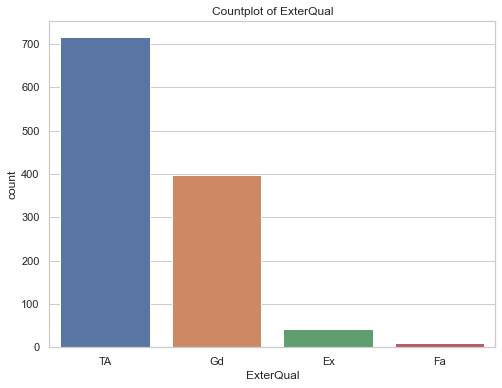

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [35]:
# Let's check the column ExterQual

plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=housing_train)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

housing_train['ExterQual'].value_counts()

Observation:

Maximum, 717 number of ExterQual is TA.

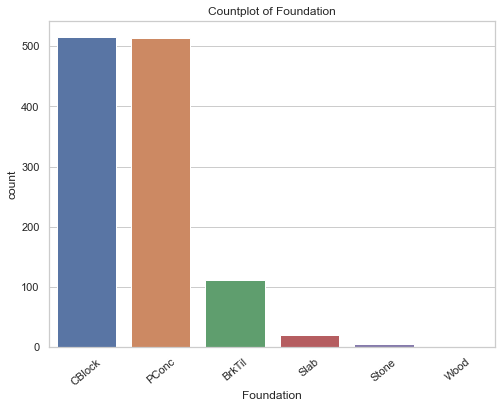

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [36]:
# Let's checking the column Foundation

plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=housing_train)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

housing_train['Foundation'].value_counts()

Observation:

Maximum, 516 number of Foundation are CBlock.

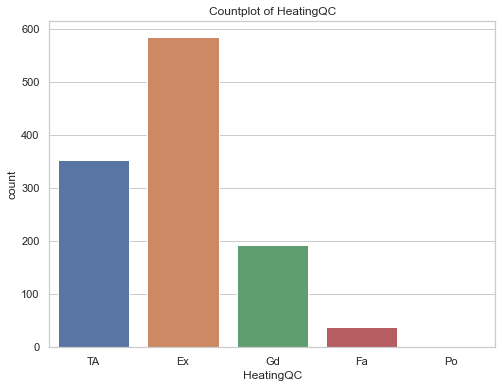

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [37]:
# Let's check the column HeatingQC

plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=housing_train)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

housing_train['HeatingQC'].value_counts()

Observation:

Maximum, 585 number of HeatingQC is Ex.

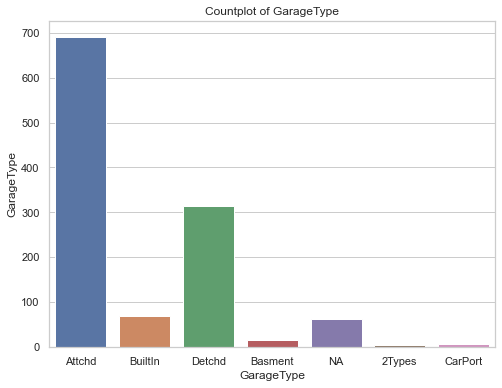

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [38]:
# Let's check the column GarageType

plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=housing_train)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

housing_train['GarageType'].value_counts()

Observation:

Maximum, 691 number of GarageType are Attchd.

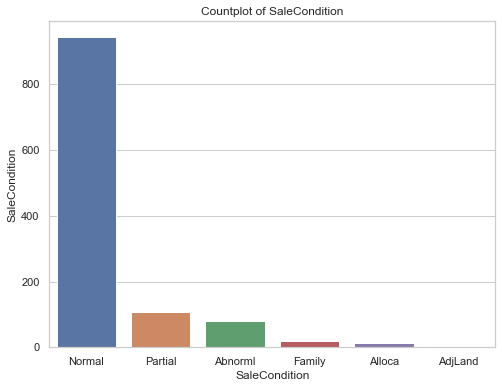

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [40]:
# Let's check the column SaleCondition

plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=housing_train)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

housing_train['SaleCondition'].value_counts()

Observation:

Maximum, 945 number of SaleCondition is normal.

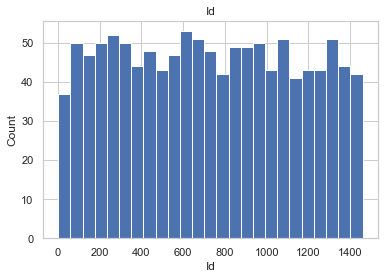

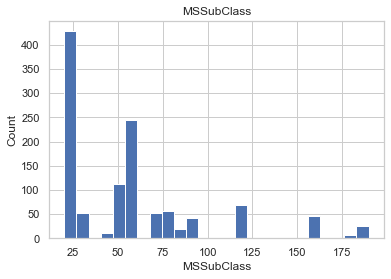

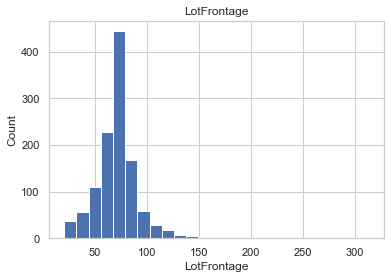

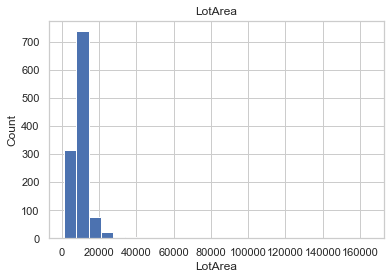

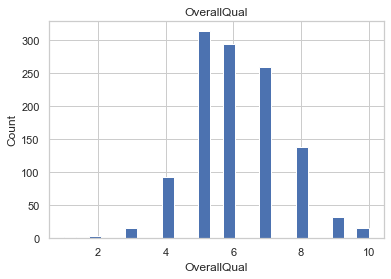

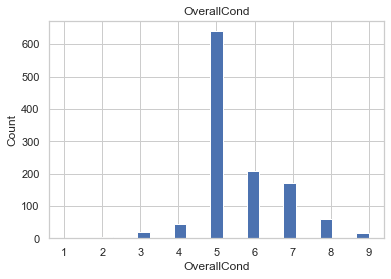

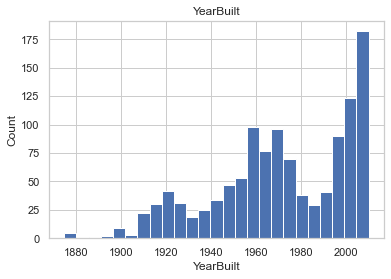

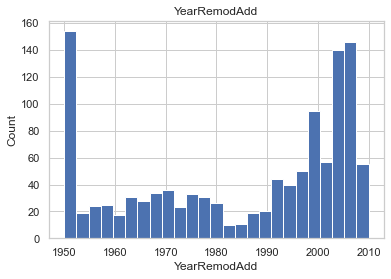

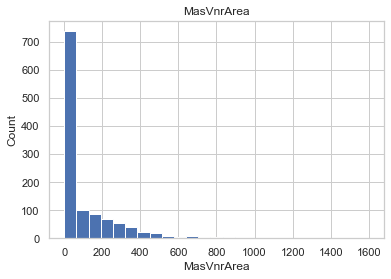

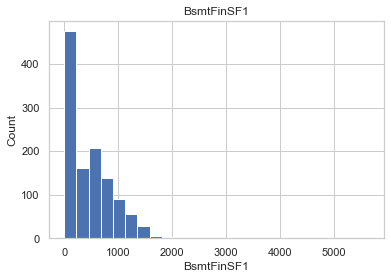

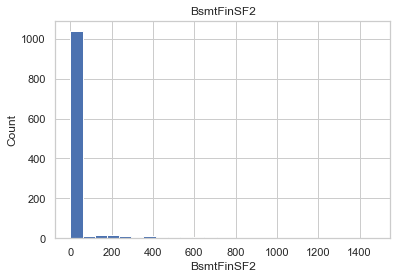

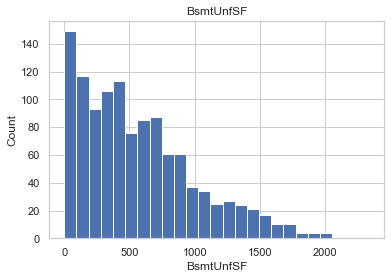

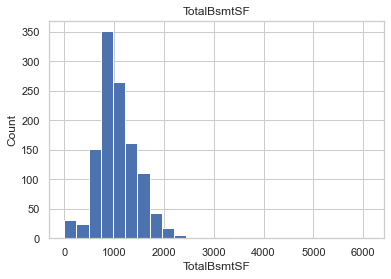

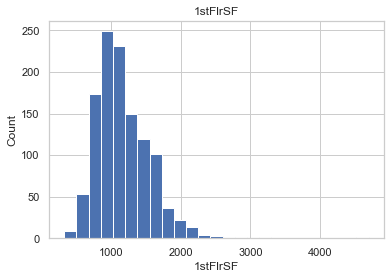

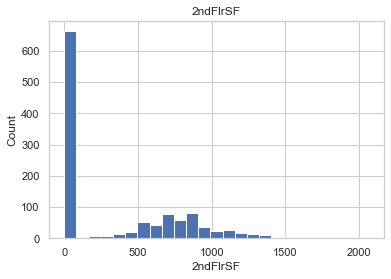

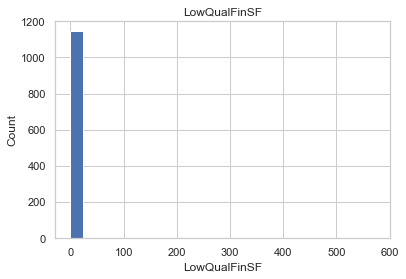

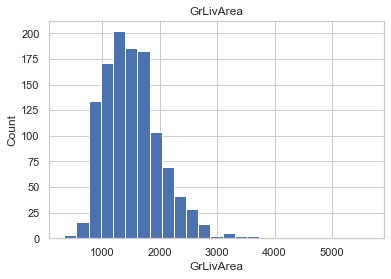

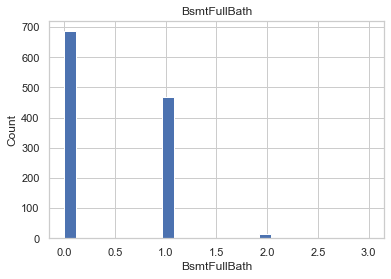

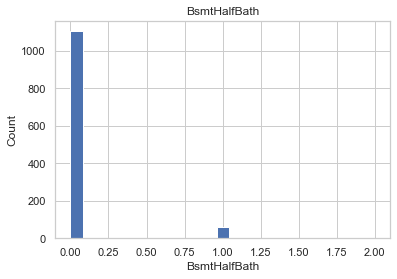

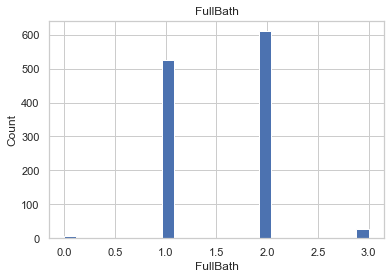

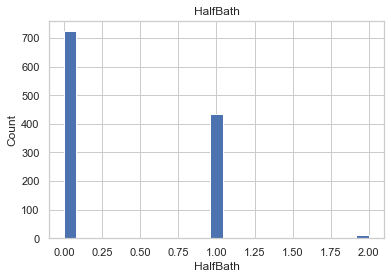

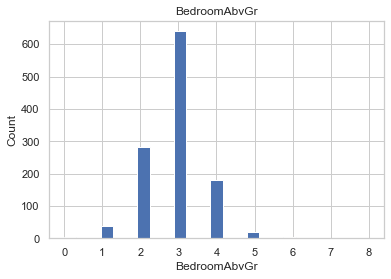

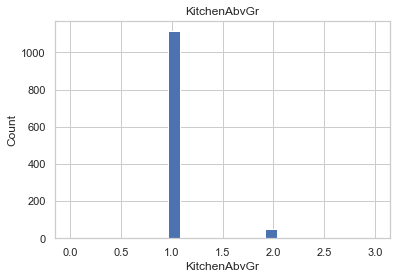

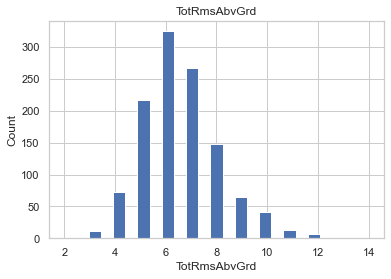

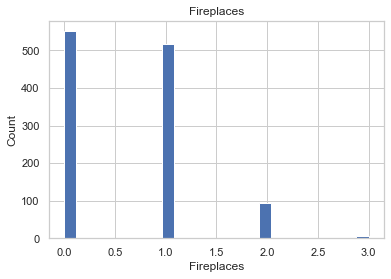

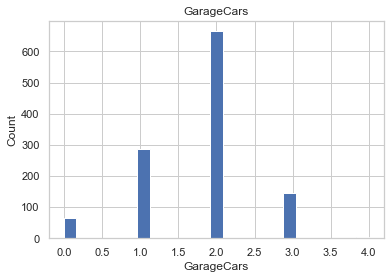

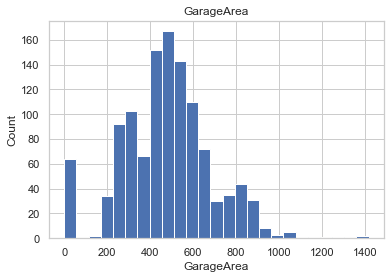

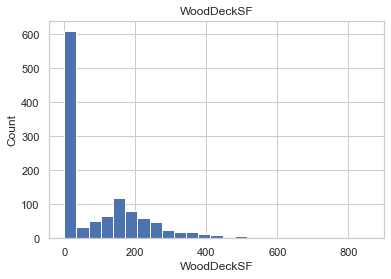

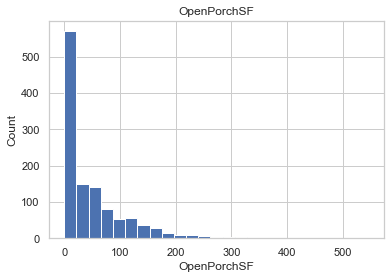

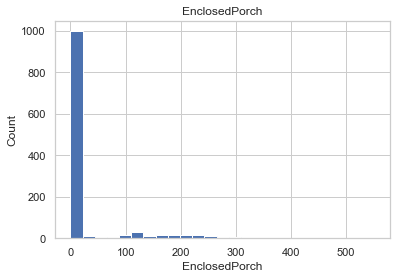

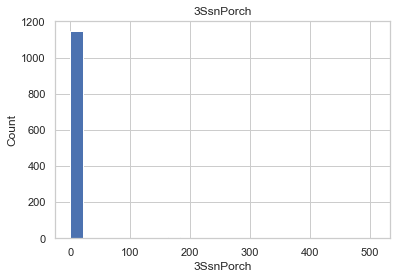

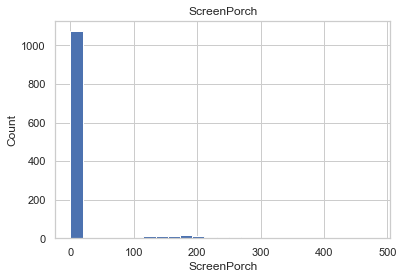

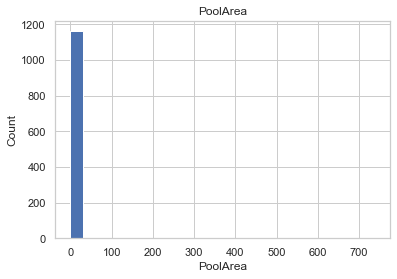

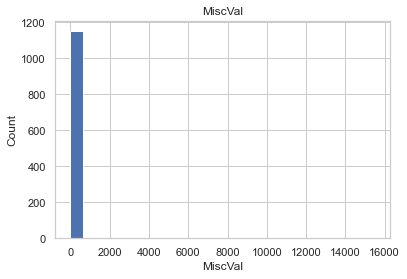

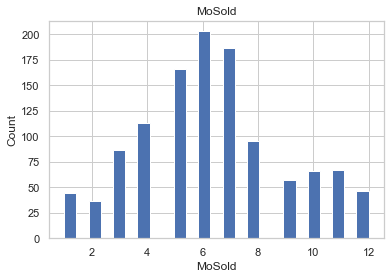

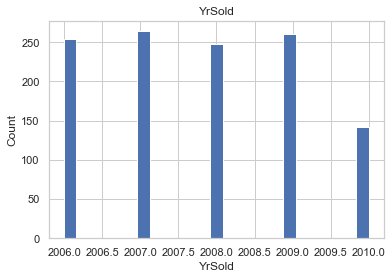

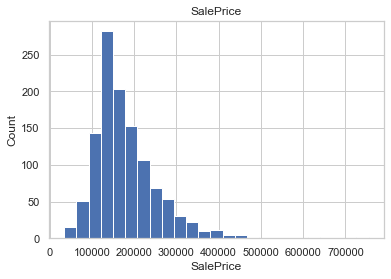

In [41]:
# Let's plot the histogram of every numerical column

for col in housing_train.describe().columns:
    data=housing_train.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

# Bivariate Analysis

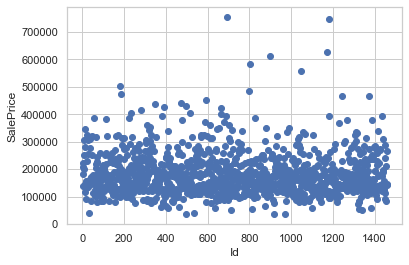

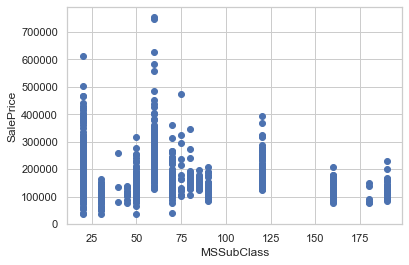

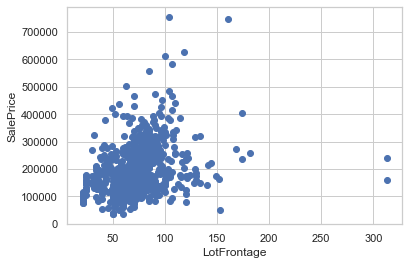

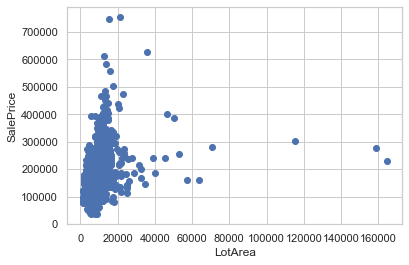

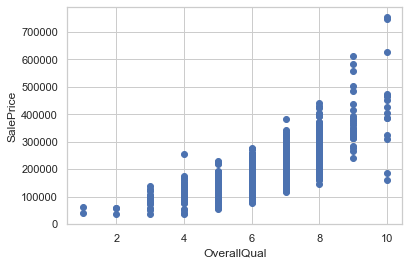

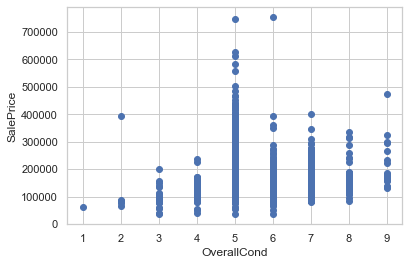

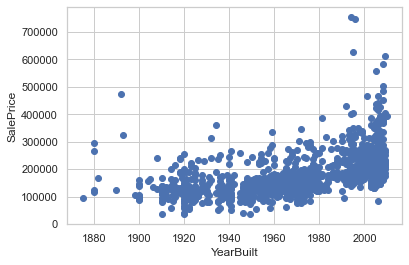

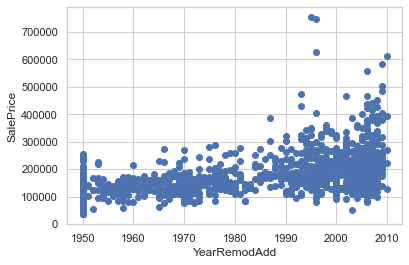

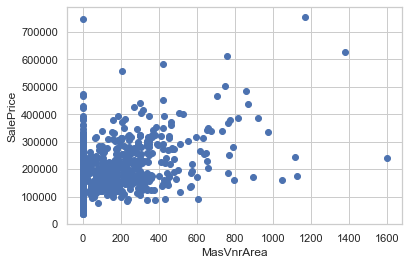

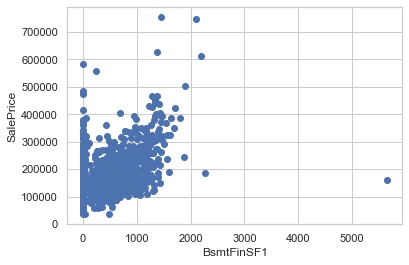

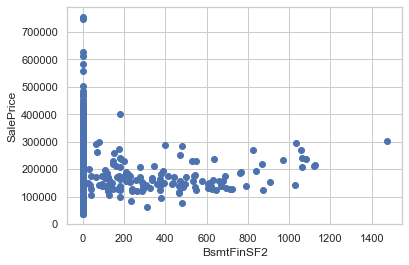

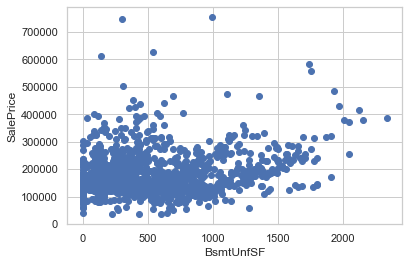

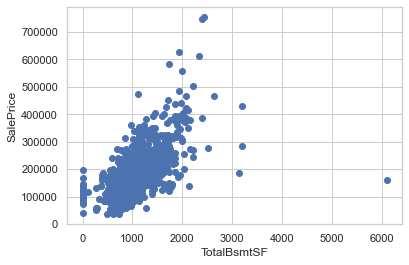

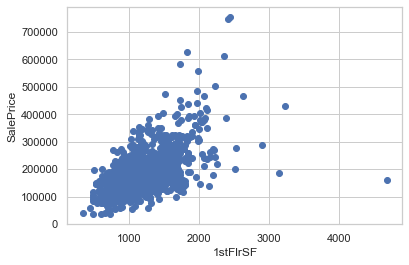

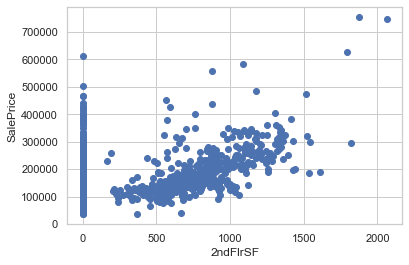

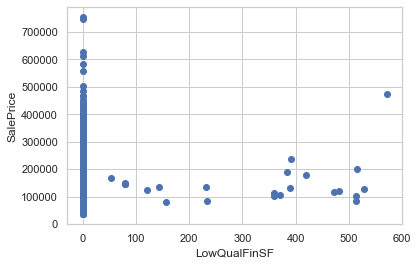

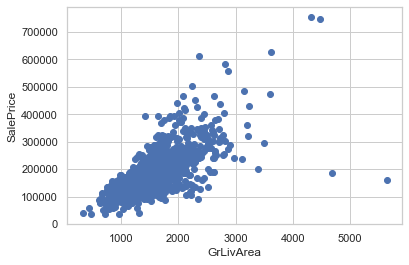

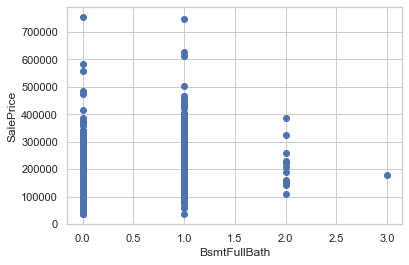

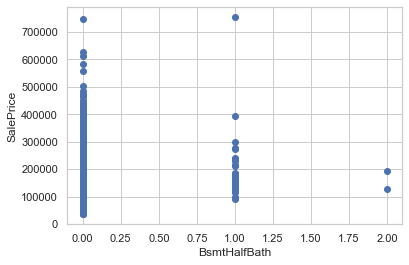

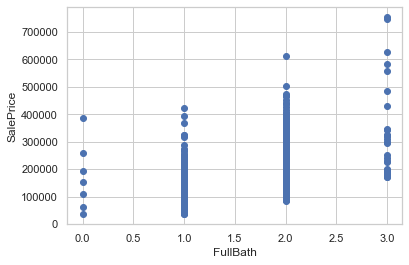

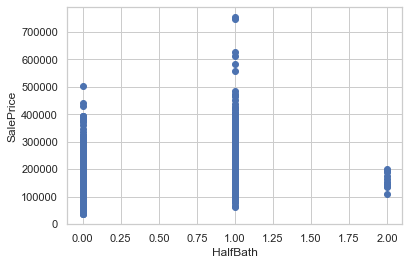

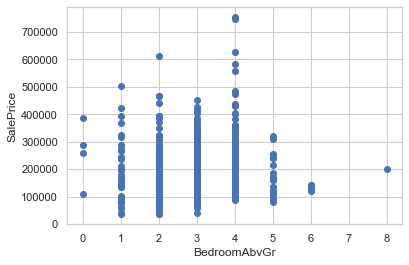

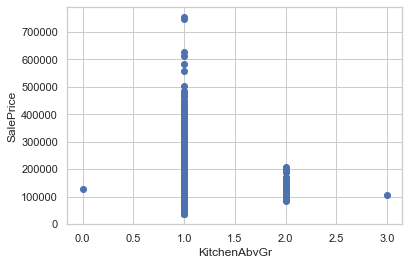

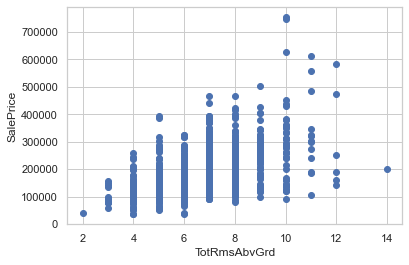

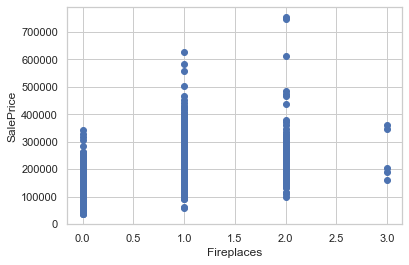

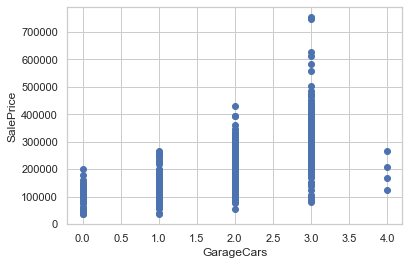

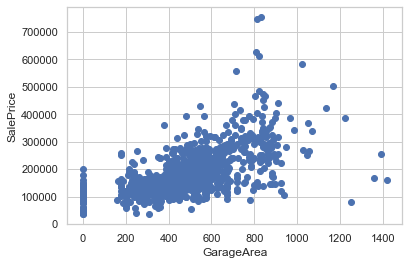

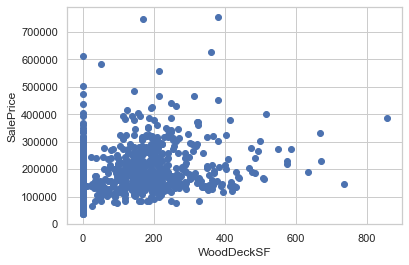

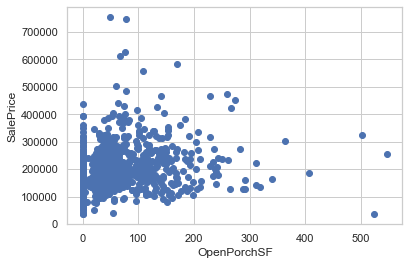

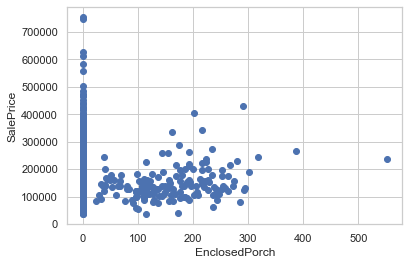

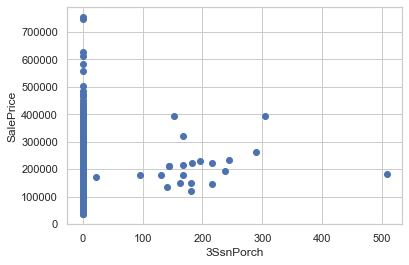

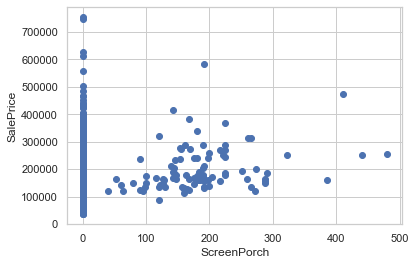

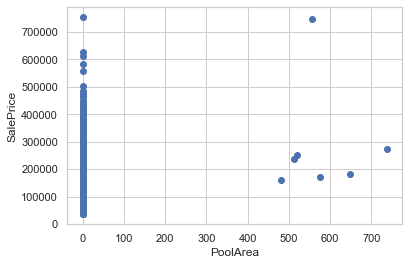

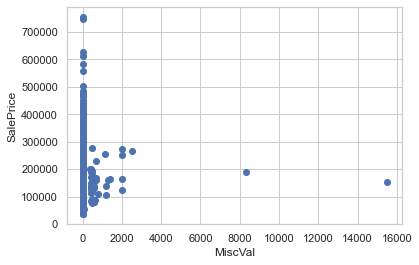

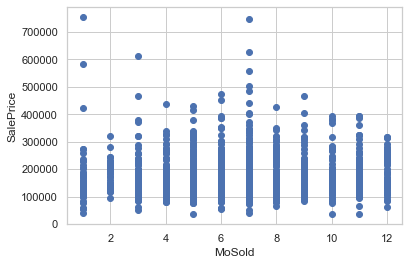

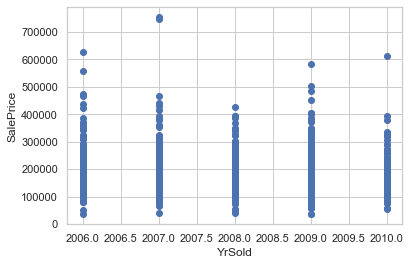

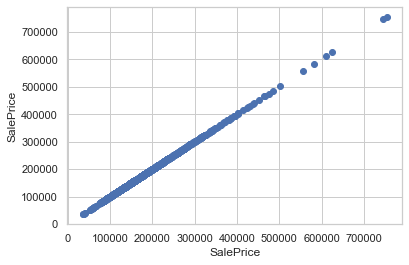

In [42]:
# Let's plot the Scatter plot between all feature variables and target variable

for col in housing_train.describe().columns:
    data=housing_train.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

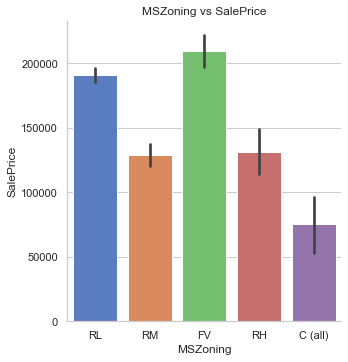

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [43]:
# Let's plot the Factor plot of MSZoning vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(housing_train.groupby('SalePrice')['MSZoning'].value_counts());

Observation:

SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

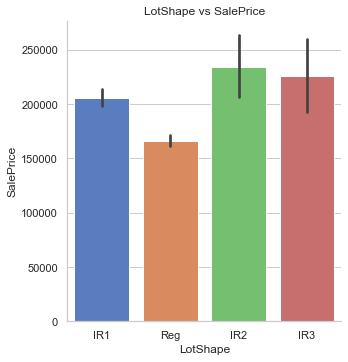

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [44]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(housing_train.groupby('SalePrice')['LotShape'].value_counts());

Observation:

SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

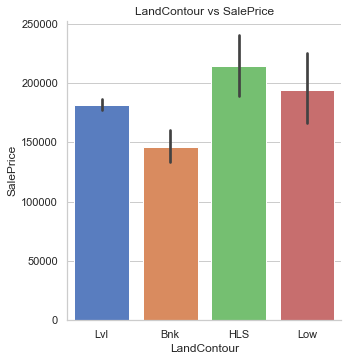

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [45]:
# Let's plot the Factor plot of LandContour vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(housing_train.groupby('SalePrice')['LandContour'].value_counts())

Observation:

SalePrice is maximum with HLS LandContour

<Figure size 576x432 with 0 Axes>

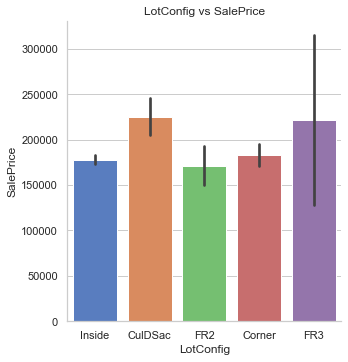

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [46]:
# Let's plot the Factor plot of LotConfig vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(housing_train.groupby('SalePrice')['LotConfig'].value_counts())

Observation:

SalePrice is maximum with CulDsac LotConfig.

<Figure size 1152x1152 with 0 Axes>

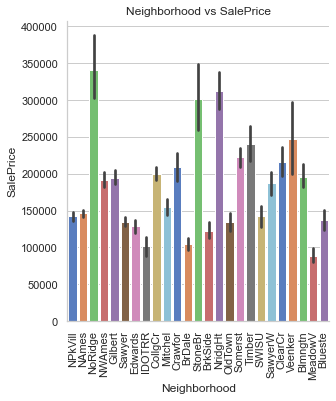

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [47]:
# Let's plo the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(housing_train.groupby('SalePrice')['Neighborhood'].value_counts())

Observation:

SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

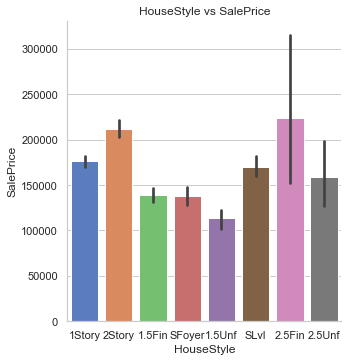

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [48]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(housing_train.groupby('SalePrice')['HouseStyle'].value_counts())

Observation:

SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

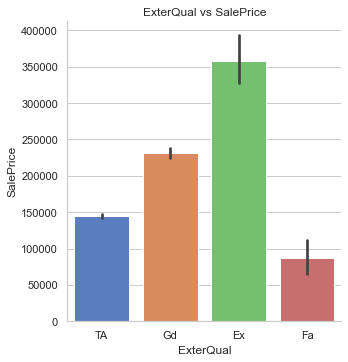

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [49]:
# Let's plot the Factor plot of ExterQual vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(housing_train.groupby('SalePrice')['ExterQual'].value_counts())

Observation:

SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

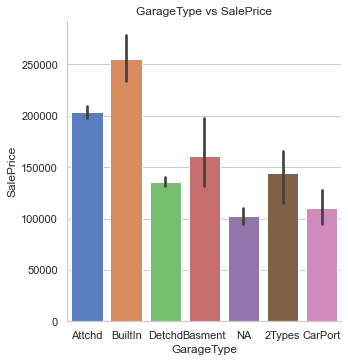

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [50]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(housing_train.groupby('SalePrice')['GarageType'].value_counts())

Observation:

SalePrice is maximum with Builtin GarageType.

<Figure size 576x432 with 0 Axes>

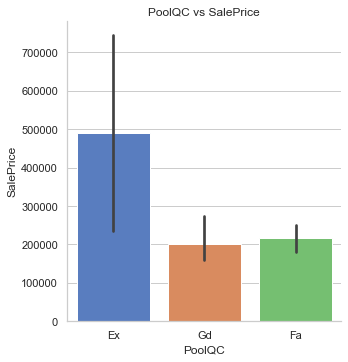

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [51]:
# Let's plot the Factor plot of PoolQC vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=housing_train,kind='bar',size=5,palette='muted',aspect=1)
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(housing_train.groupby('SalePrice')['PoolQC'].value_counts())

Observation:

SalePrice is maximum with Ex PoolQC

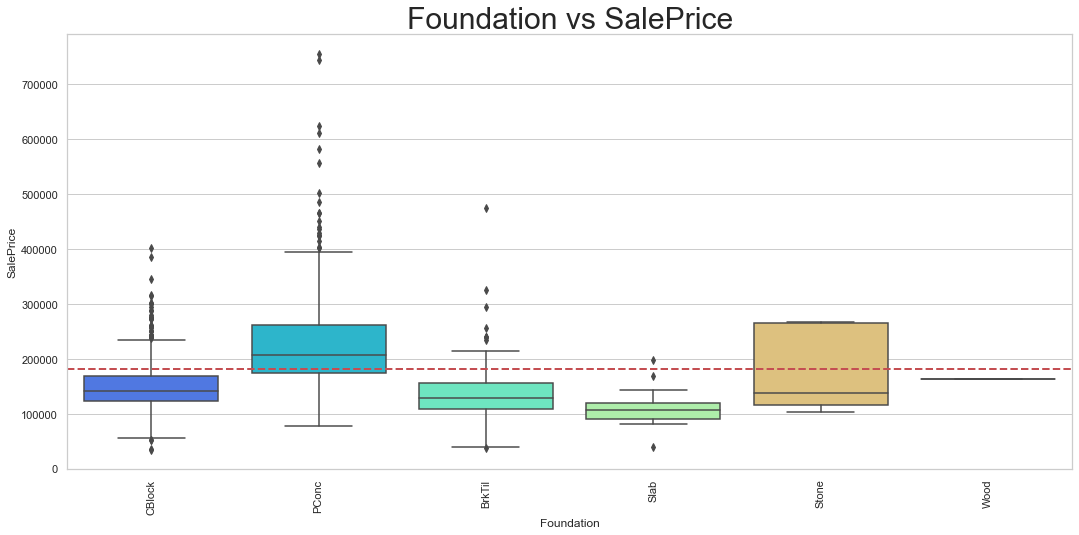

In [52]:
# Let's plot the Foundation vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(housing_train['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=housing_train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:

SalePrice is maximum with PConc.

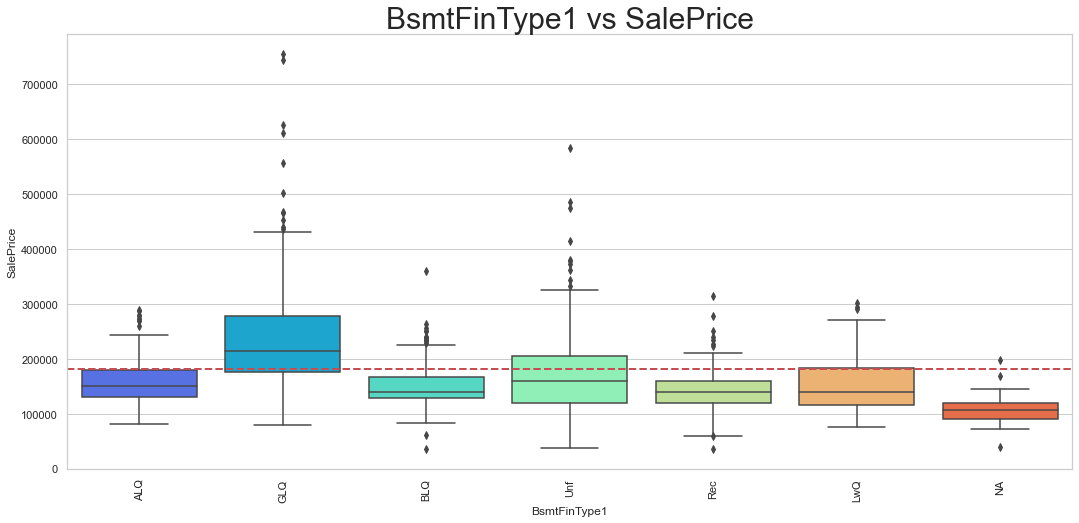

In [53]:
# Let's plot the BsmtFinType1 vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(housing_train['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=housing_train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

Observation:

SalePrice is maximum with GLQ BsmtFinType1.

# Multivariate Analysis

<Figure size 1008x1008 with 0 Axes>

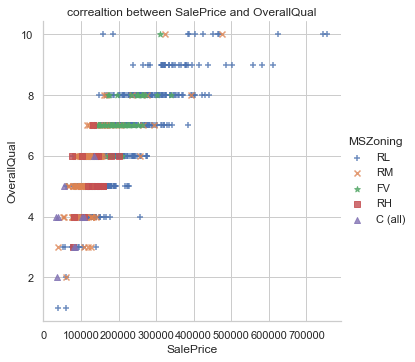

In [54]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallQual',fit_reg=False,data=housing_train,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and OverallQual')
plt.ylabel('OverallQual')
plt.show()

Observation:

With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

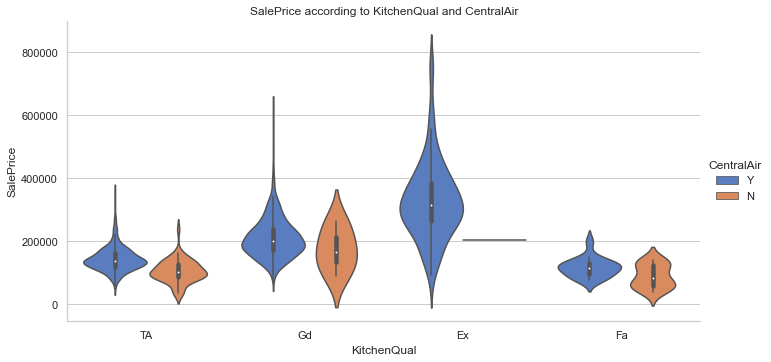

In [55]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=housing_train,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

Observation:

SalePrice is maximum with Ex kitchenQual and CentralAir.

<Figure size 1008x1008 with 0 Axes>

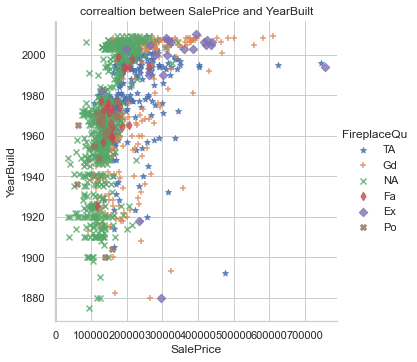

In [56]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=housing_train,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.show()

Observation:

As the YearBuilt is increasing SalePrice is also increasing.

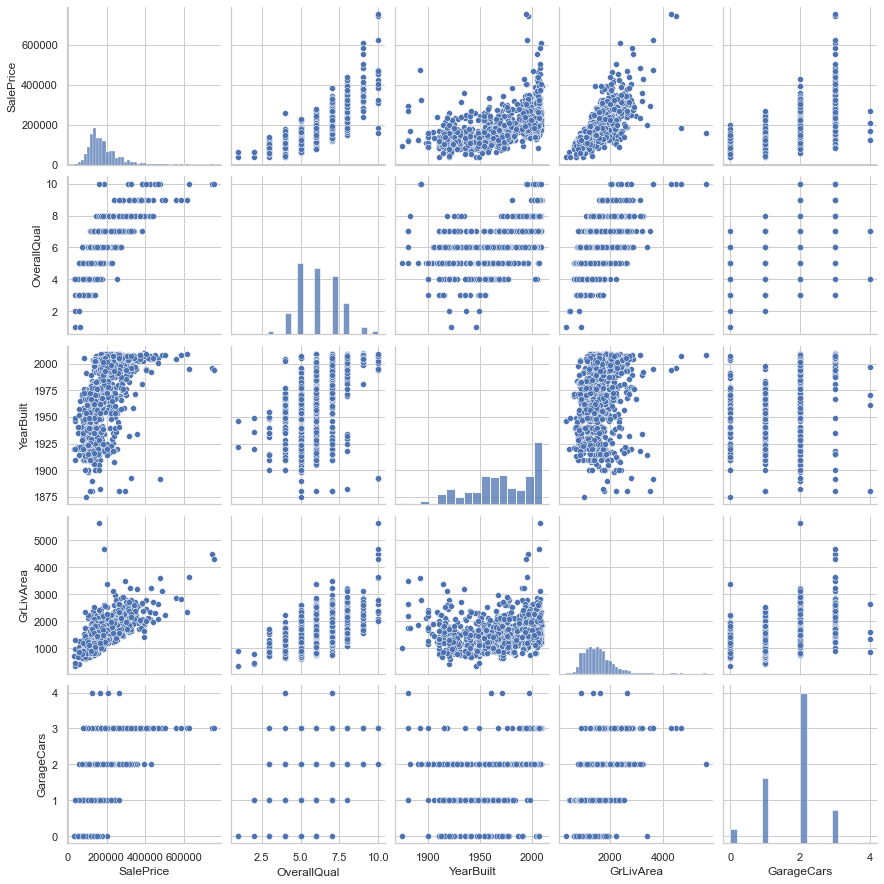

In [57]:
# Let's plot the pairplot

sns.pairplot(housing_train, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars']);

Observation:

SalePrice is highly positively correlated with GrLivArea and OverallQual.

# PRE - PROCESSING

In [59]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

housing_train = pd.get_dummies(housing_train, columns = categorical_cols, drop_first=True)
housing_train

Id  MSSubClass  LotFrontage  LotArea Alley Utilities  OverallQual  \
0     127         120         70.0     4928   NaN    AllPub            6   
1     889          20         95.0    15865   NaN    AllPub            8   
2     793          60         92.0     9920   NaN    AllPub            7   
3     110          20        105.0    11751   NaN    AllPub            6   
4     422          20         70.0    16635   NaN    AllPub            6   
...   ...         ...          ...      ...   ...       ...          ...   
1163  289          20         70.0     9819   NaN    AllPub            5   
1164  554          20         67.0     8777   NaN    AllPub            4   
1165  196         160         24.0     2280   NaN    AllPub            6   
1166   31          70         50.0     8500  Pave    AllPub            4   
1167  617          60         70.0     7861   NaN    AllPub            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0               5       1976          1976         0.0         120   
1               6       1970          1970         0.0         351   
2               5       1996          1997         0.0         862   
3               6       1977          1977       480.0         705   
4               7       1977          2000       126.0        1246   
...           ...        ...           ...         ...         ...   
1163            5       1967          1967        31.0         450   
1164            5       1949          2003         0.0           0   
1165            6       1976          1976         0.0         566   
1166            4       1920          1950         0.0           0   
1167            5       2002          2003         0.0         457   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0              0        958         1078       958         0             0   
1            823       1043         2217      2217         0             0   
2              0        255         1117      1127       886             0   
3              0       1139         1844      1844         0             0   
4              0        356         1602      1602         0             0   
...          ...        ...          ...       ...       ...           ...   
1163           0        432          882       900         0             0   
1164           0          0            0      1126         0             0   
1165           0        289          855       855       601             0   
1166           0        649          649       649       668             0   
1167           0        326          783       807       702             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           958             0             0         2         0             2   
1          2217             1             0         2         0             4   
2          2013             1             0         2         1             3   
3          1844             0             0         2         0             3   
4          1602             0             1         2         0             3   
...         ...           ...           ...       ...       ...           ...   
1163        900             0             0         1         0             3   
1164       1126             0             0         2         0             2   
1165       1456             0             0         2         1             3   
1166       1317             0             0         1         0             3   
1167       1509             1             0         2         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  \
0                1             5           1      1977.0           2   
1                1             8           1      1970.0           2   
2                1             8           1      1997.0           2   
3                1             7           1      1977.

In [60]:
# Let's drop unnecessary columns

housing_train.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
housing_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             1976         0.0         120           0        958   
1             1970         0.0         351         823       1043   
2             1997         0.0         862           0        255   
3             1977       480.0         705           0       1139   
4             2000       126.0        1246           0        356   
...            ...         ...         ...         ...        ...   
1163          1967        31.0         450           0        432   
1164          2003         0.0           0           0          0   
1165          1976         0.0         566           0        289   
1166          1950         0.0           0           0        649   
1167          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  GarageArea  \
0                5           1      1977.0           2         440   
1                8           1      1970.0           2         621   
2                8           1      1997.0           2         455   
3                7           1      1977.0           2         546   
4                8           1      1977.0           2         529   
...   

In [61]:
# Let's make a copy of our dataset

housing_train_cap = housing_train.copy()

In [62]:
def percentile_capping(housing_train, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=housing_train[col], limits=(from_low_end, from_high_end), inplace=True)

In [63]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [64]:
percentile_capping(housing_train, features, 0.01, 0.10)

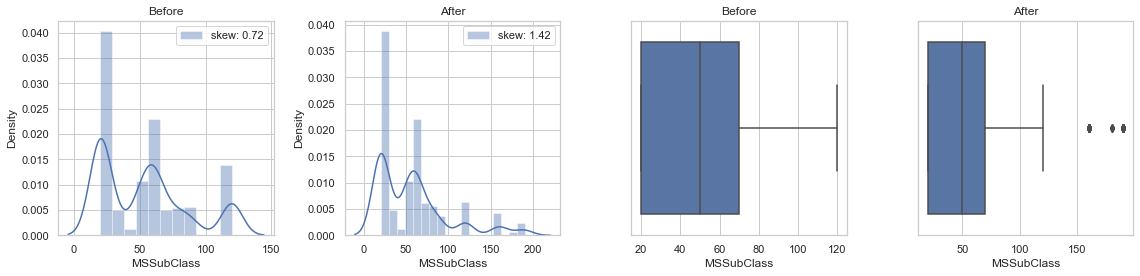

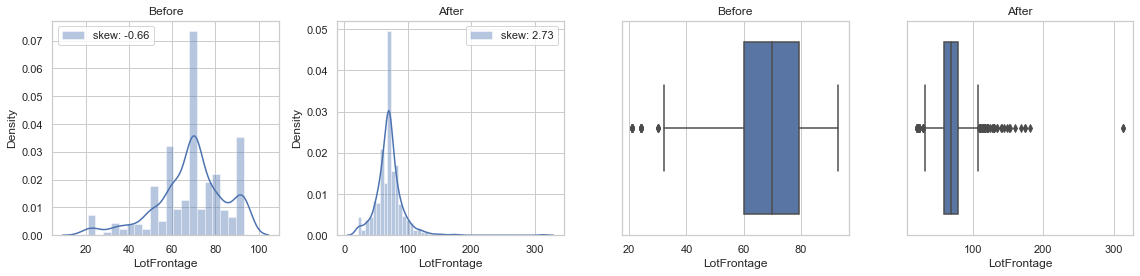

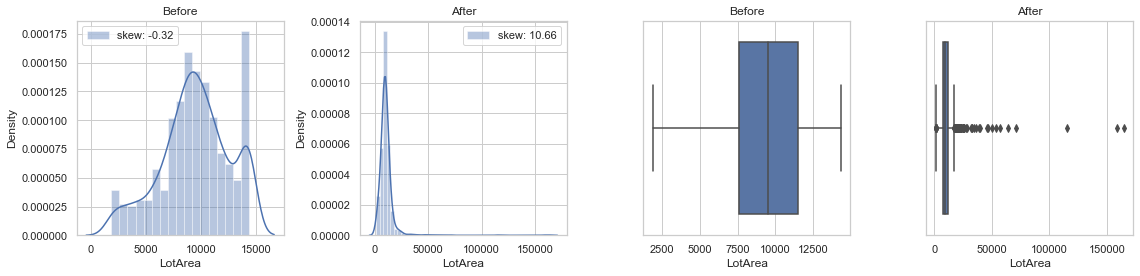

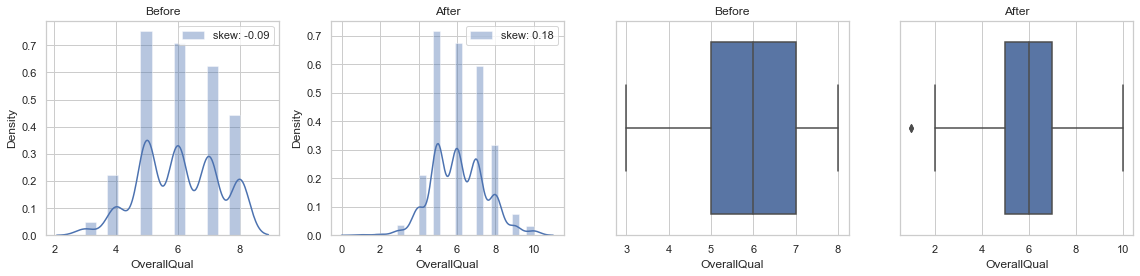

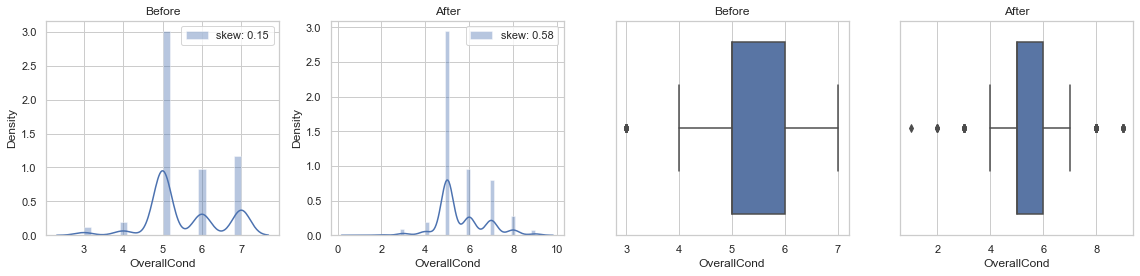

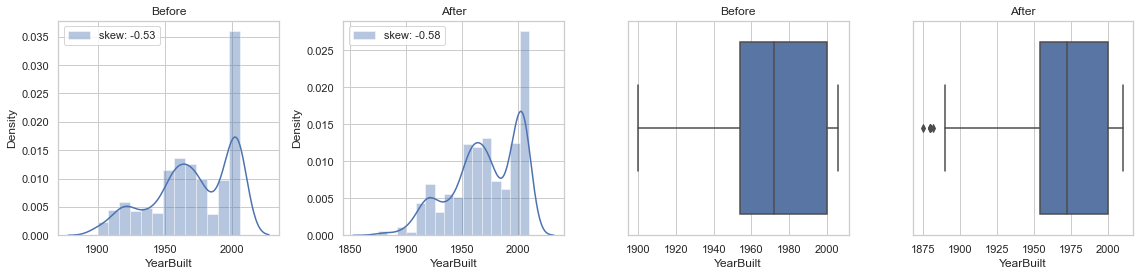

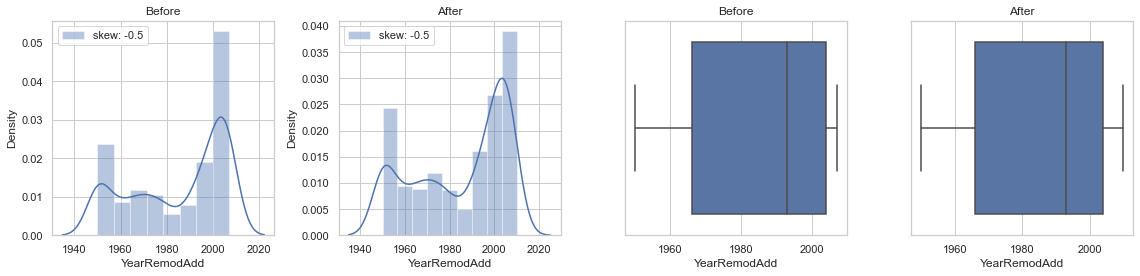

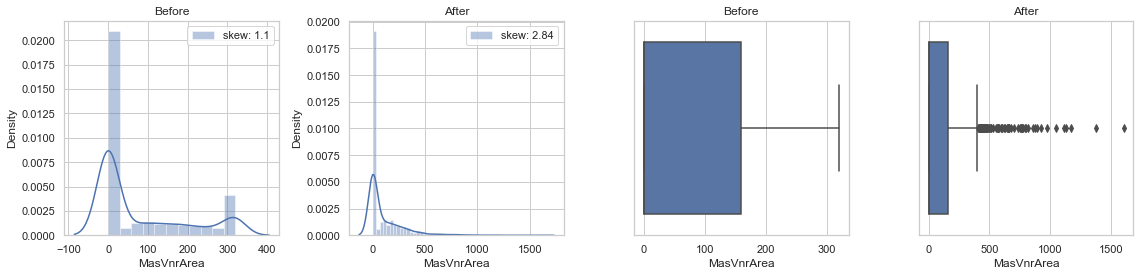

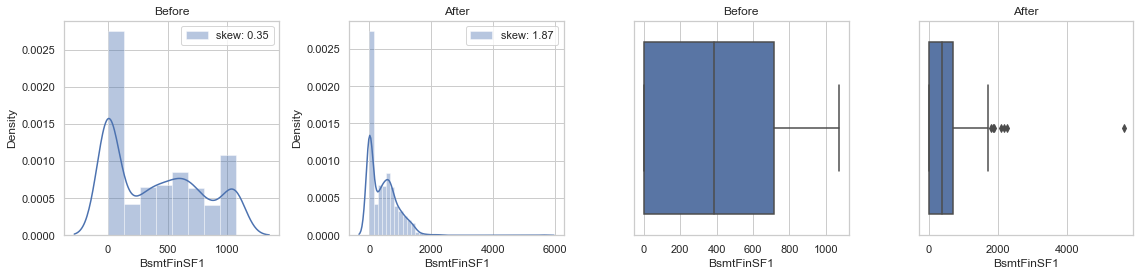

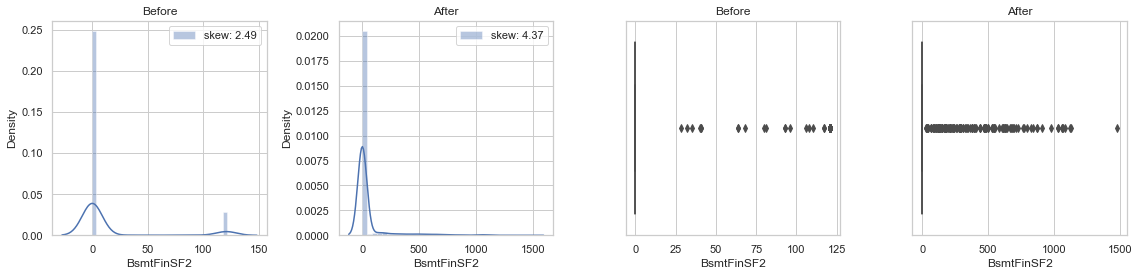

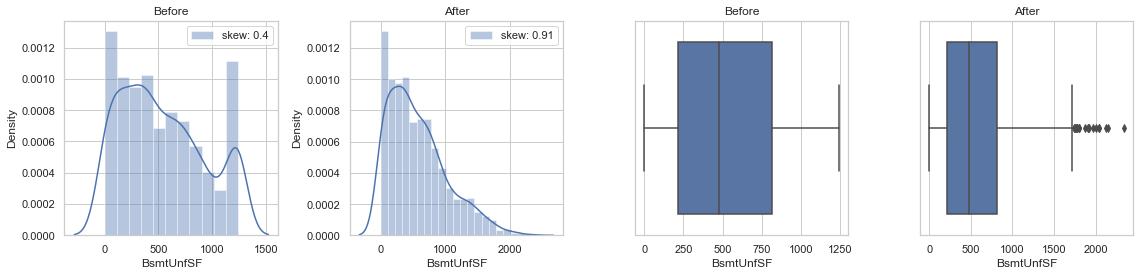

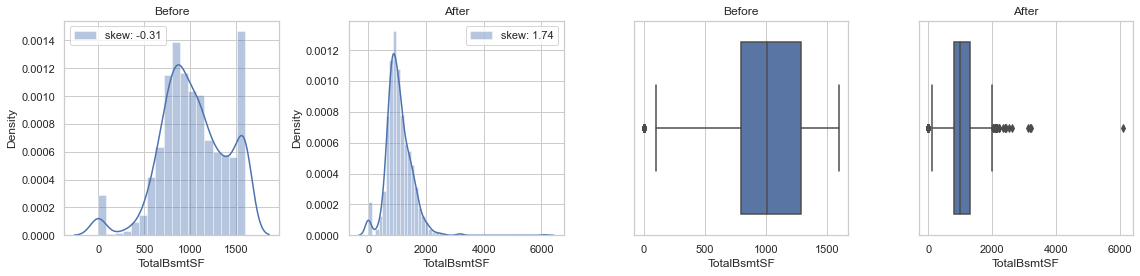

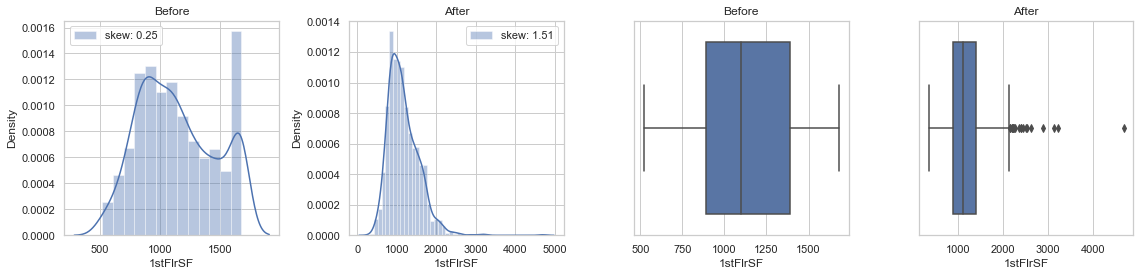

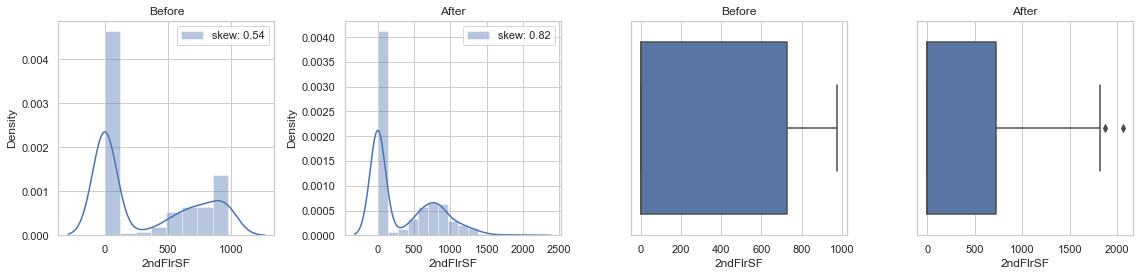

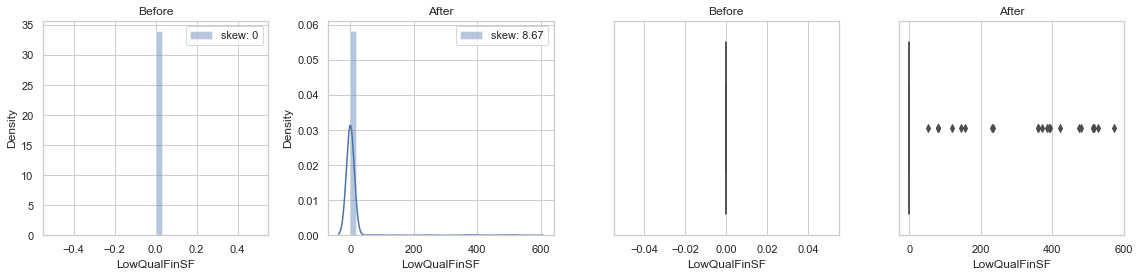

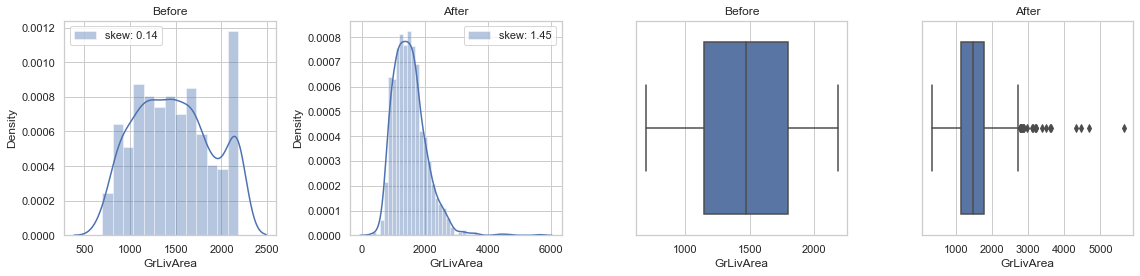

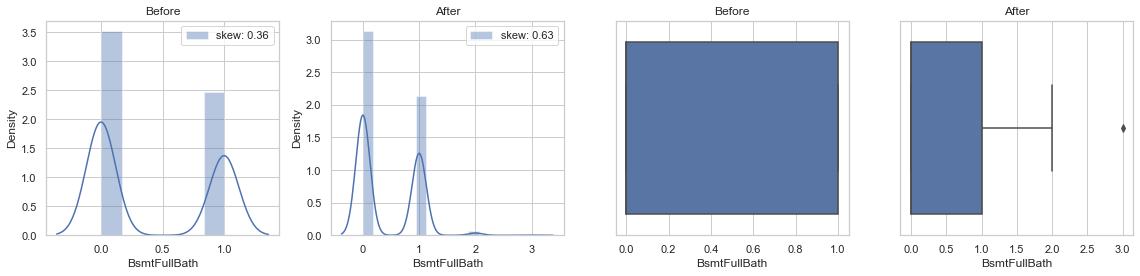

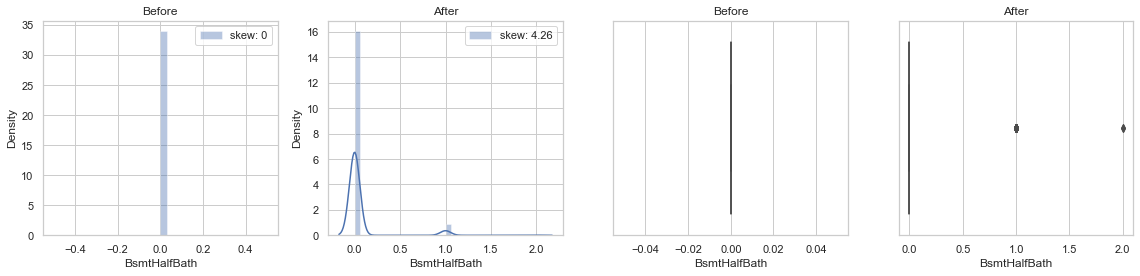

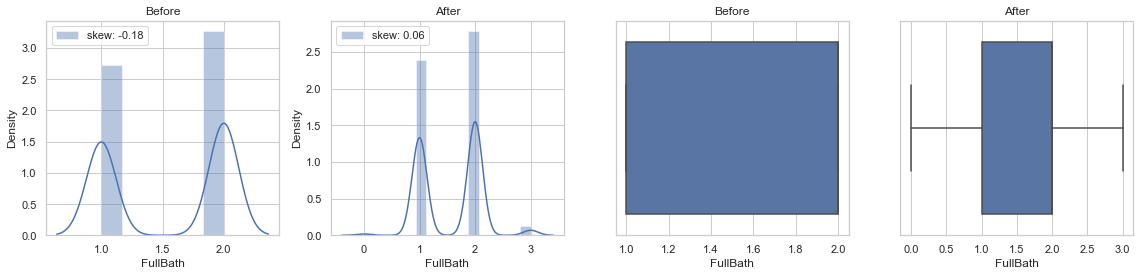

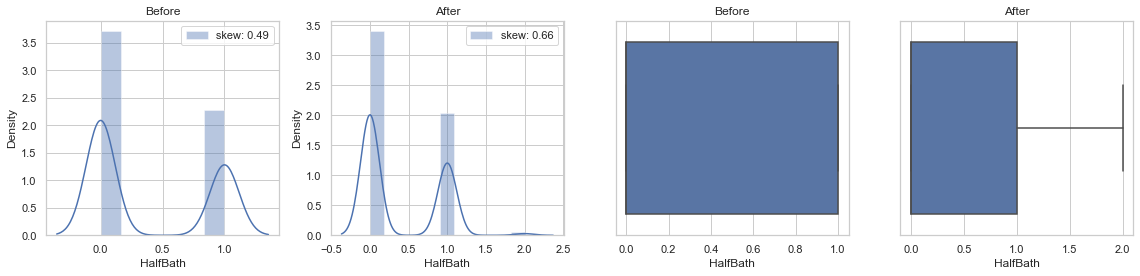

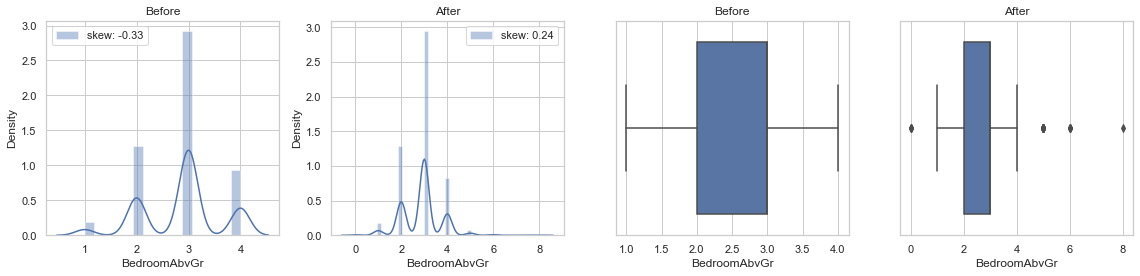

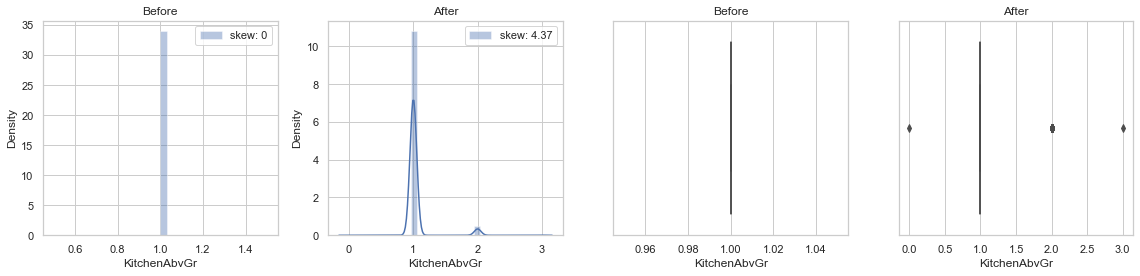

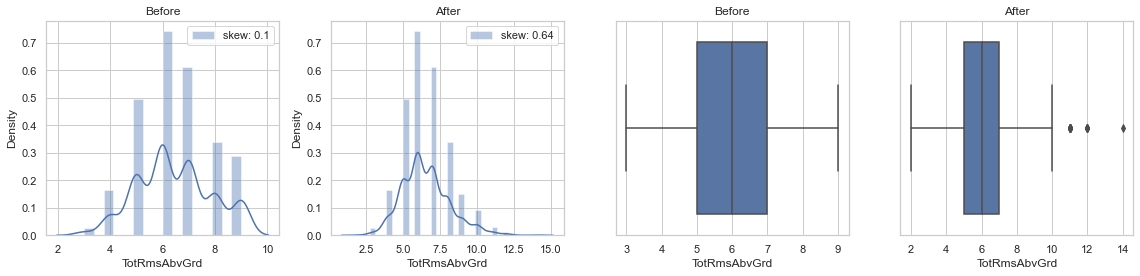

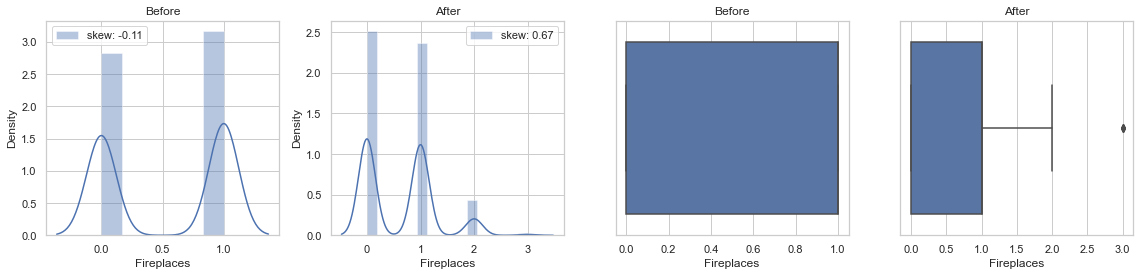

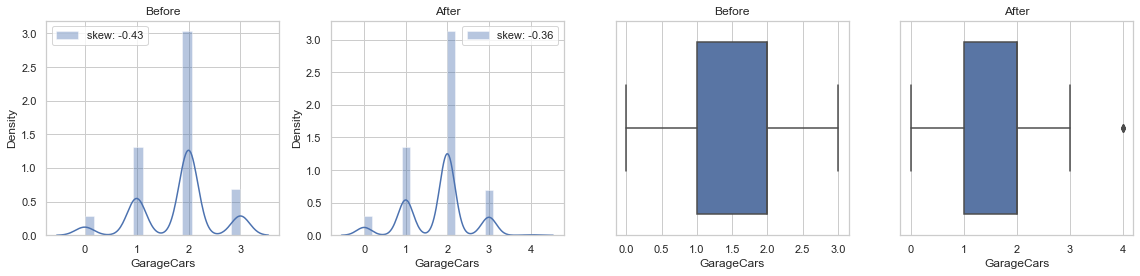

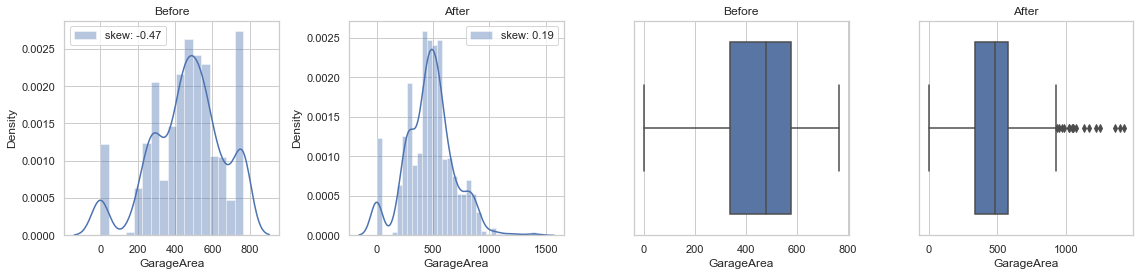

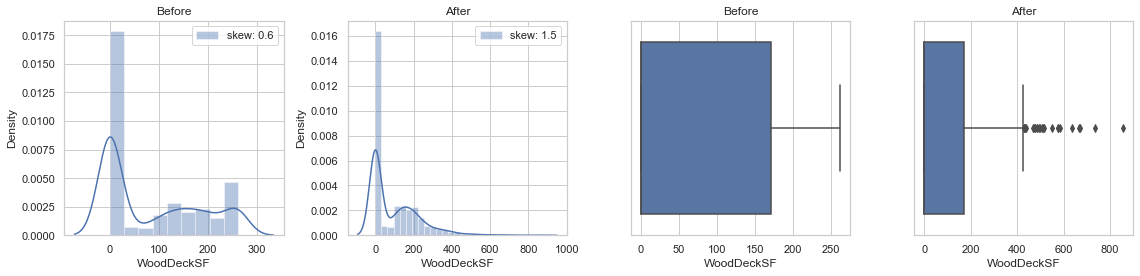

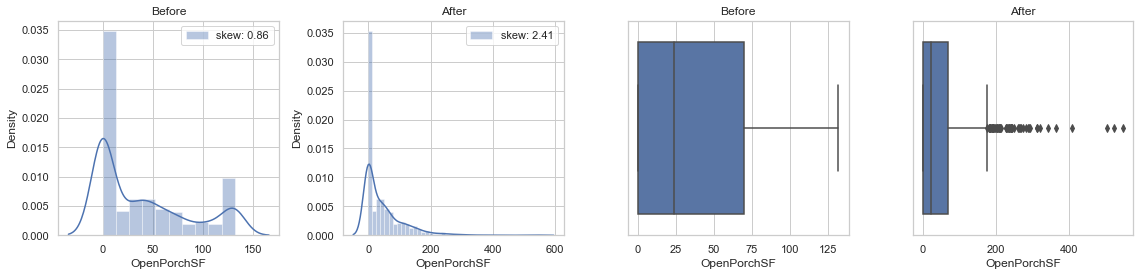

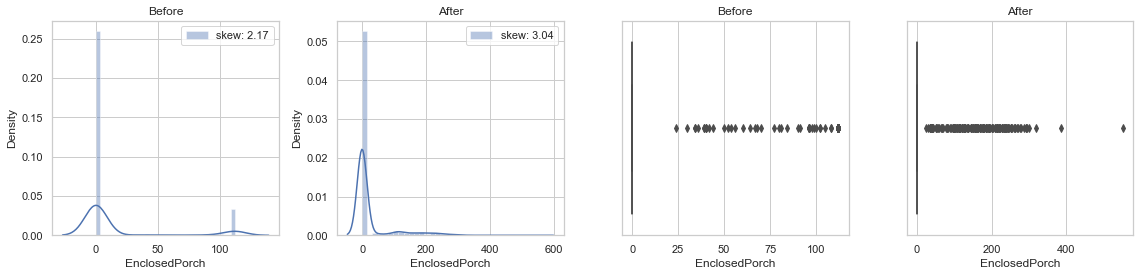

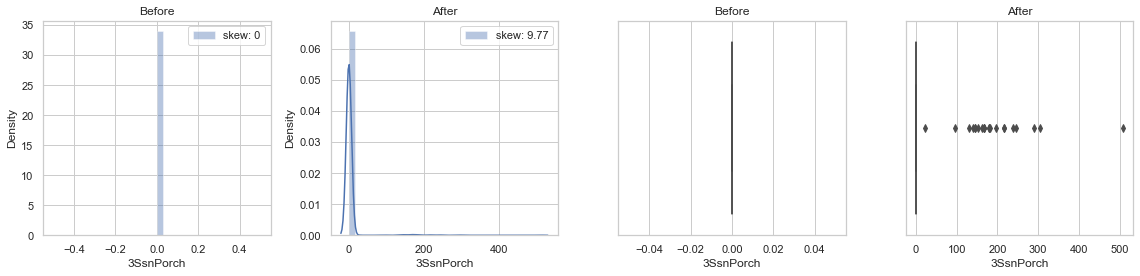

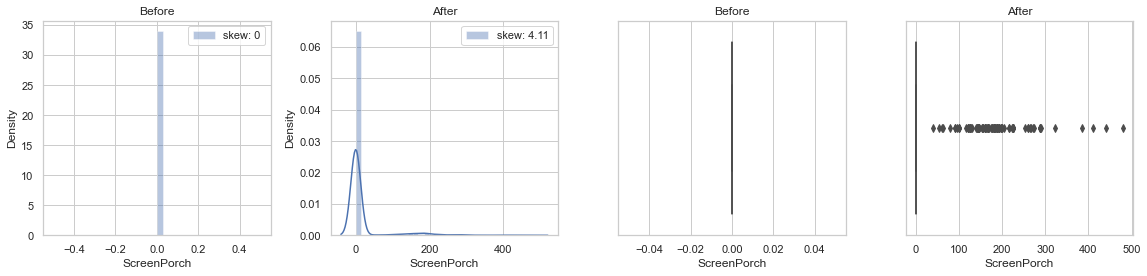

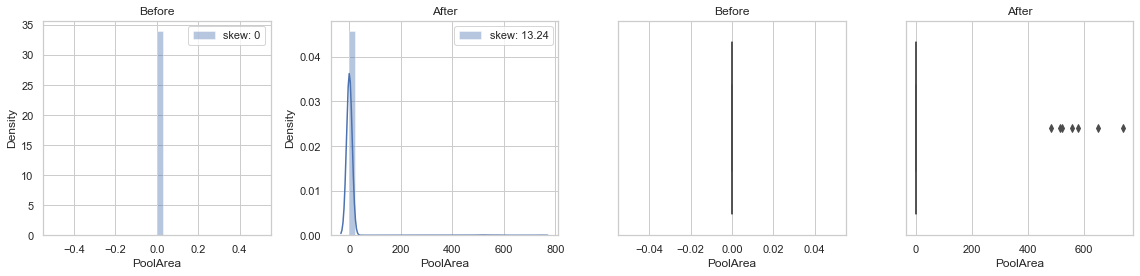

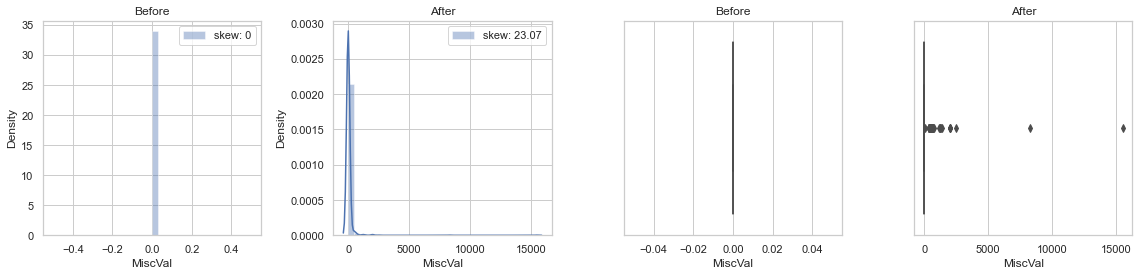

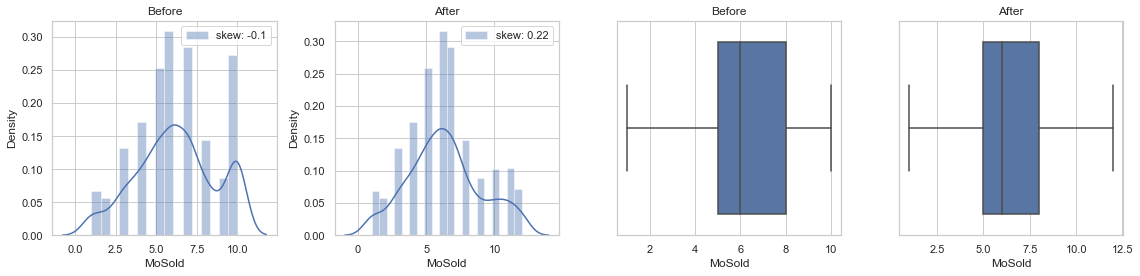

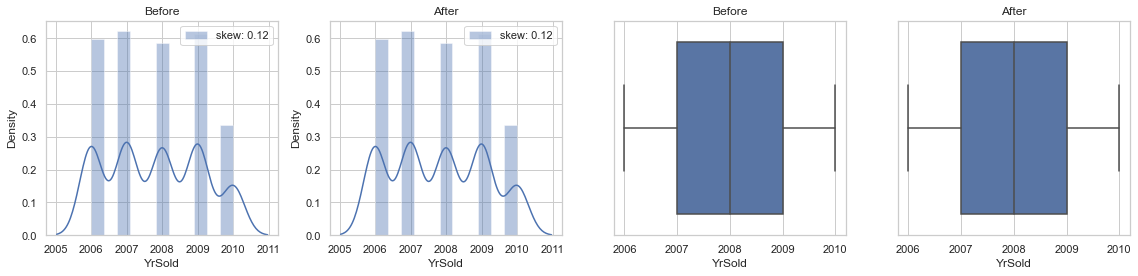

In [65]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(housing_train[col], label="skew: " + str(np.round(housing_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(housing_train_cap[col], label="skew: " + str(np.round(housing_train_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(housing_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(housing_train_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();

In [66]:
# Let's check the shape

housing_train_cap.shape

(1168, 244)

# MODEL TRAINING

In [67]:
housing_train_x=housing_train_cap.drop(columns=['SalePrice'],axis=1)
y=housing_train_cap['SalePrice']

In [68]:
#Scaling input variables

sc=StandardScaler()
x=sc.fit_transform(housing_train_x)
x=pd.DataFrame(x,columns=housing_train_x.columns)

# PCA

In [69]:
# Let's explore the PCA

covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

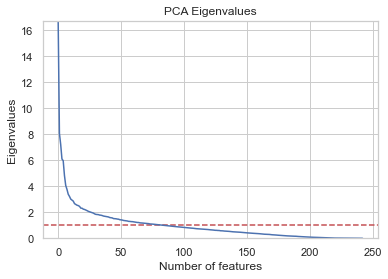

In [70]:
# Let's plot the PCA componenets

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

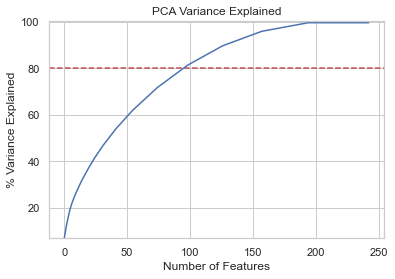

In [71]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [72]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [73]:
pd.DataFrame(data=x)

0         1          2         3         4         5         6   \
0     0.024220 -1.896831   0.132677  0.813156 -2.206239 -1.805521  1.035663   
1    -2.247532 -4.218759   2.433978  2.469202  5.428766  2.218245  4.355415   
2    -3.177172 -0.067189   0.034364 -0.530545  1.283725 -2.883337  1.487503   
3    -2.108226 -3.530498   1.215952  2.012069  1.144673  0.329004 -3.080503   
4    -3.131141 -1.375870   0.344764  1.783523  0.114820 -0.337445 -0.856954   
...        ...       ...        ...       ...       ...       ...       ...   
1163  3.795608 -2.918757  -1.471796 -0.273140 -2.503510  0.281714 -1.205151   
1164  4.015047  2.373310  10.993928 -4.930673 -3.243036  0.557390  0.472758   
1165  0.639948 -1.219355  -0.937625 -1.444928 -1.285734 -5.678012  0.851777   
1166  6.935131  2.136535  -2.252124 -2.370818  2.506093  1.338809 -0.219171   
1167 -3.748664  1.997061  -0.459355 -0.736084 -0.689850 -2.325332  1.361225   

            7         8         9         10        11        12        13  \
0     1.140985  0.750045  1.908866  2.577947 -1.828066  5.006258  3.060521   
1    -0.561387 -2.471616  0.693208  3.224234  5.220651 -1.654468  0.037060   
2     0.125468  0.734429 -1.437110 -1.466122 -0.117151 -1.074452  1.419343   
3    -0.170374  1.551595  0.786084  1.018440 -0.785306  2.493874  2.441691   
4     1.613603 -0.126401 -1.221644  1.744019  0.983687  0.254426 -0.920193   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.265157  0.677286  0.525286 -1.349816  0.858827 -1.810160  1.275100   
1164 -1.430251 -1.053269 -0.060783 -0.847343  2.594213 -1.266554 -0.147976   
1165  3.367735  1.128816  2.763467  4.432900 -3.400331  4.887844  2.021035   
1166 -0.667502  1.002079 -0.595161  0.009020  1.083060  1.099756  1.525815   
1167 -1.769338 -0.706832 -0.561701 -0.129229 -0.462279 -0.273565 -0.362410   

            14        15        16        17        18        19        20  \
0     0.478997 -2.269525  0.919925 -0.223051 -5.282436  0.360444 -1.076755   
1    -3.980924  2.237667 -3.083646 -1.409430 -1.542378 -0.259303 -0.150430   
2    -0.659038 -0.483973  1.308217 -0.375221  1.152025  0.045737 -2.220298   
3     0.688311  0.156008 -0.310552 -0.758164 -1.946201 -0.700196 -0.345659   
4     2.868296 -2.557061  0.527769 -0.670319 -0.749736 -0.790442  0.190069   
...        ...       ...       ...       ...       ...       ...       ...   
1163 -0.907945  0.813561  0.730198 -0.507076 -0.952571  0.369127  0.696400   
1164  1.494890  0.996653 -0.116360 -0.270868 -0.215300  1.282316 -1.066266   
1165  0.137779 -1.722991  2.225190  0.779058 -7.511163  2.600073 -0.853145   
1166  0.392589  0.741101  2.727643 -0.426694 -0.041358 -1.759504  0.372472   
1167 -0.164716 -0.748729  1.708655  0.265708  0.181521  1.364062 -0.345489   

            21        22        23        24        25        26        27  \
0    -0.602423  0.984886  0.800504 -1.058440  0.421867 -1.220744  0.414959   
1    -2.443568 -0.490688 -1.673711  2.330174 -0.390809  3.627835 -1.566585   
2     2.363655  0.849616  1.312922  0.111858  0.173329  1.129494  1.347043   
3     0.511622 -0.797580  0.826207 -1.553207 -0.283885  1.270132 -0.719106   
4     1.485391 -3.035631  0.003095  0.825590 -1.802200  1.214242  0.519285   
...        ...       ...       ...       ...       ...       ...       ...   
1163  1.766279 -0.946583  1.468210  0.959598  0.507279  1.531250  0.868748   
1164  0.463253 -0.858939 -0.279594 -0.646633 -0.003088 -0.694094 -0.135359   
1165  0.992288  4.859248  1.115980  2.015188  1.325200 -2.624843  3.375242   
1166 -1.214535  5.513574 -2.813446  6.292228 -0.213056  1.606255 -0.961325   
1167 -0.170358  0.392399 -0.073590  0.046766 -0.217386 -0.300482 -0.595852   

            28        29        30        31        32        33        34  \
0     1.910304  0.348915 -0.533569 -1.114785 -0.514088  0.367142 -2.097685   
1    -0.416404  3.491778  2.234147  2.024000 -1.081256  1.170920  0.073686   
2     1.039699 -0.

In [74]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 98 is 0.8489222880592258


In [75]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=54)

In [76]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8320324663517142
Error:
Mean absolute error: 21756.64702536255
Mean squared error: 1036043262.9415274
Root Mean Squared Error: 32187.625928942434
r2_score: 0.8421163271204617
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 35229.84188034188
Mean squared error: 3606625154.645299
Root Mean Squared Error: 60055.184244537115
r2_score: 0.4503827721456165
*************************************************************


score of KNeighborsRegressor() is: 0.7916466364845692
Error:
Mean absolute error: 26372.731623931624
Mean squared error: 1492180694.1244445
Root Mean Squared Error: 38628.754757621224
r2_score: 0.772605086085481
*************************************************************


score of SVR() is: -0.04568281740041291
Error:
Mean absolute error: 58256.24775443976
Mean squared error: 6883562062.20224
Root Mean Squared Error: 82967.23487137702
r2_score: -0.0489929327

# Ridge Regressor is giving us minimum Rmse score so we choose it as our final model.

Hyperparameter tuning

In [77]:
# Let's Use the GridSearchCV to find the best paarameters in Ridge Regressor

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [78]:
# Let's use the Ridge Regressor with its best parameters

RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.831987213640623


Mean absolute error: 21578.292831388764
Mean squared error: 1021194998.9578985
Root Mean Squared error: 31956.141803382623


r2_score: 0.8443790689744692




In [79]:
# Let's Cross validate the Ridge model

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.85041284 0.7836073  0.81054211 0.67750572 0.83586407 0.40399273
 0.8005468  0.79901407 0.67654819 0.86445998]
Mean Score: 0.7502493802033132
Standard deviation: 0.1306444102223732


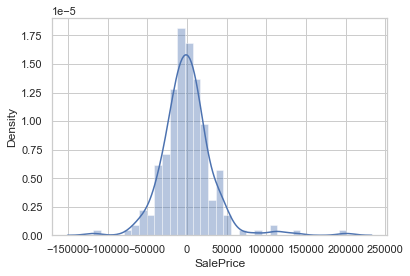

In [80]:
# Let's plot the distribution plot and the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

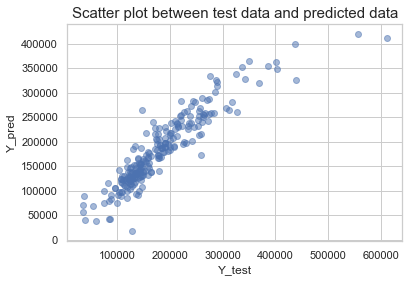

In [81]:
# Let' plot the Scatter plot between test data and predicted data

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

# Let's Test our TEST DataSet

In [82]:
# Let's load the dataset

housing_test=pd.read_csv("test.csv")

Let's apply all the changes as we did in our train dataset

In [83]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
housing_test[columns] = housing_test[columns].fillna('NA')

#filling missing values in MasVnrType with None
housing_test['MasVnrType'] = housing_test['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
housing_test['GarageYrBlt'] = housing_test['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

housing_test['LotFrontage'].fillna(housing_test['LotFrontage'].median(),inplace=True)
housing_test['MasVnrArea'].fillna(housing_test['MasVnrArea'].median(),inplace=True)

In [84]:
#Encoding categorical columns
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

housing_test = pd.get_dummies(housing_test, columns = categorical_colss, drop_first=True)

In [85]:
housing_test.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [86]:
housing_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            2006       200.0        1249           0        673         1922   
1            1984         0.0        1036           0        184         1220   
2            2001         0.0           0           0       1753         1753   
3            1950         0.0         275           0        429          704   
4            2007        74.0           0           0        894          894   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0        1922         0             0       1922             1             0   
1        1360         0             0       1360             1             0   
2        1788         0             0       1788             0             0   
3         860       704             0       1564             0             0   
4         894      1039             0       1933             0             0   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             3             1             8           1   
1           1         0             1             1             4           1   
2           2         0             3             1             7           1   
3           1         1             3             1             7           1   
4           2         1             4             1             9           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0        2005.0           3         676         178           51   
1        1984.0          

In [87]:
housing_cap=housing_test.copy()

In [88]:
def percentile_capping(housing_test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=housing_test[col], limits=(from_low_end, from_high_end), inplace=True)

In [89]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [90]:
percentile_capping(housing_cap, features, 0.01, 0.10)
housing_cap.shape

(292, 213)

In [91]:
# Let's Scale the input variables

sc=StandardScaler()
x1=sc.fit_transform(housing_test)
x1=pd.DataFrame(x1,columns=housing_test.columns)

In [92]:
# Let's check the PCA

covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

In [93]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [94]:
pd.DataFrame(data=x1)

0         1         2         3         4         5         6   \
0   -7.230157  2.222011  1.496484  4.043805 -1.655639 -0.938563  1.229618   
1   -3.072242 -0.239101  0.445989 -0.207622 -2.681405  2.294892  0.164982   
2   -4.352944  1.294936 -0.698007  0.687803 -1.170315 -1.543662 -1.602387   
3    2.364058 -1.528634  0.738506  0.329316  3.287338 -1.342443  0.537068   
4   -4.680780  2.076735 -1.818632 -0.837280  3.532847 -1.361782  0.684049   
..        ...       ...       ...       ...       ...       ...       ...   
287 -5.088818  1.288022 -0.952124  0.164966 -1.297198 -1.665925 -0.964441   
288 -0.163327 -0.632468 -0.353900 -1.653287 -2.521442 -0.312983  0.007369   
289  0.975206 -2.648628  2.088382  0.749168 -1.112006  0.604258 -0.894954   
290  2.728598 -1.949752 -0.625144 -0.841542  2.141371 -0.728874  2.233374   
291  3.768191 -2.646545 -0.785820 -5.308845  1.306190  3.236218  1.069471   

           7         8         9         10        11        12        13  \
0   -0.832792 -0.930155  1.453895  1.732049 -2.409918  0.140064 -0.367026   
1   -1.183889 -0.636800  1.014300  1.255976 -0.423491  1.615218  2.333984   
2    1.987478  0.499538 -0.524646 -0.448051  0.401829  0.769327 -0.054876   
3   -1.117912 -1.383874  1.915644  0.147852  1.439666 -2.265302 -0.679915   
4    1.214704  0.471511 -0.417898  0.244754 -0.343047 -0.323500 -1.356812   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.188912  0.089998 -0.857465 -0.941931  1.028176  0.394199 -0.809359   
288  2.832698 -0.715647 -0.503165  0.214013 -1.481427 -2.081515  0.016687   
289  0.607123 -2.172489  0.161085  0.205123 -0.012552  0.951126  0.723235   
290 -2.913802  1.798795  0.819127  2.276241 -0.285591  1.381616 -3.440417   
291 -3.256347 -1.592740  0.824843 -1.243071 -1.733503  0.918311  3.615436   

           14        15        16        17        18        19        20  \
0   -0.814065  0.407617 -1.690971  0.354629 -1.051802  0.622528  1.372926   
1    0.657691 -2.509073 -1.032836 -0.843425  3.171877  1.548481  1.867012   
2    0.106045  0.920133  0.261084  0.408110 -0.205547 -0.330083 -0.540028   
3    1.789731 -0.387989  0.348123 -1.724975 -3.056798  0.648676  1.577302   
4    1.909554 -1.777668 -0.512112 -1.056734 -1.227971  0.935636 -0.159965   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.235323  0.325545  0.628795 -0.458594 -0.133424  0.604868 -0.079315   
288 -0.799443  0.002190 -0.903879 -0.299103 -0.963269 -1.186381  0.214673   
289 -0.230604  1.027945  0.288377 -0.690847  0.893197  0.077104  0.705382   
290  1.070617 -0.428622  1.124744  0.375863 -0.730794  0.469675  0.764436   
291 -2.279395 -0.912520 -1.085194 -0.305981 -1.320108  0.220346 -2.335327   

           21        22        23        24        25        26        27  \
0    1.223724  1.264089 -0.005366  0.848494 -0.540583 -1.736523 -1.241006   
1    0.804674 -1.706532  1.194882  2.679763  0.611713 -0.615734 -0.923142   
2   -1.841833  1.332129  0.849742 -0.197083 -1.312754 -0.338440 -0.189892   
3   -0.444395 -0.374883 -0.042982 -1.765040  0.609361  0.446645 -0.418607   
4    0.653972  0.356912 -1.728224  1.745440  2.027601  0.937935 -0.885103   
..        ...       ...       ...       ...       ...       ...       ...   
287 -1.499832  0.701650  0.416312 -0.346094 -0.072531  0.301612  0.522385   
288  1.985634 -0.311306  0.041975  1.502324 -0.178235  0.426354 -0.585801   
289 -1.091956  0.453456 -0.206436  1.180519  0.810275 -0.399209 -1.661209   
290 -0.995832  3.711432 -3.162205  0.453873 -0.029030  0.821085  0.593882   
291 -0.011230 -0.558970  0.594991 -2.542784  0.569381 -0.772843  1.643735   

           28        29        30        31        32        33        34  \
0    0.735304  0.131705  0.795363  0.485132  0.858931  0.898337  0.040531   
1    1.128289 -0.908327  0.410471 -0.603305  0.050743 -0.559869  2.061150   
2   -0.687818  0.827048 -0.292380 -0.785200  1.109164  0.663557 -0.925596   
3  

In [95]:
# Let's save our best model

import joblib
joblib.dump(RG,'Housing_Project.pkl')

['Housing_Project.pkl']

In [96]:
# Let;s load our save model

model=joblib.load('Housing_Project.pkl')

In [97]:
# Let's Test our save model

import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[255278.32459383 174704.98574122 223731.08382087 170232.43814324
 282854.76757668 -25436.80844702 198120.05368498 252089.68450451
 250839.42770987 160656.28227817  29426.16167055 152709.97970525
 128701.97368696 223812.6487128  276046.03207714 141324.42124414
 103369.52941348 141235.31964385 201767.02856783 251738.57228624
 160094.39151172 195101.85005755 190973.90413557  35248.48194493
  37965.71222721 153272.48774139 228629.85183576 172074.49417082
 236535.74544029  14174.79280585 131772.73875518 219567.94691372
 225775.33326945 197895.33987513  86099.51953669 230873.37703052
 282028.52931831 124531.70276394 240139.10225082  76049.75058836
  96774.19939539 285745.22219868 225689.93410139 219887.6338474
 158704.15542431  95692.82793574  93934.07492231 -47417.35944239
 228991.40617329 228449.43614235 127729.13102455 176871.50144722
  91886.66457082  21998.30934569 292183.14889466 140169.18941064
 153010.03681864 244067.57943191 167908.6516463  269314.09438061
  86790.93339014 260198.64